# Omya dataset first look and cleanup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
ruta = "omya/sources/raw_data_-_hack_a_boss_final_-_Completo.xlsx - "
ds_csv = ["BRAND", "COUNTRY", "CUST VALUE (1)", "CUST VALUE (2)", "CUSTOMER TYPE", "data_hackaboss (MAIN DATA)", "KEY ACCOUNT", "MATERIAL TYPE", "PLANT TYPE", "PLANT-SOURCING", "TYPE"]

# funcion nueva: read_csv para batch de ficheros csv
def csv_a_pd(ruta_raiz, csv_list_name, index=0):
    return pd.read_csv(ruta_raiz + csv_list_name[index] +".csv")

In [3]:
# importa los ficheros relativos a informacion
df_jerarquia = csv_a_pd(ruta, ds_csv, 0)
df_country = csv_a_pd(ruta, ds_csv, 1)
df_market_pos = csv_a_pd(ruta, ds_csv, 2)
df_relationship = csv_a_pd(ruta, ds_csv, 3)
df_market = csv_a_pd(ruta, ds_csv, 4) # sera tambien con volume importance? revisar termino
df_sales = csv_a_pd(ruta, ds_csv, 5)
df_key_acc = csv_a_pd(ruta, ds_csv, 6)
df_material_type = csv_a_pd(ruta, ds_csv, 7)
df_plant_type = csv_a_pd(ruta, ds_csv, 8)
df_plant_src = csv_a_pd(ruta, ds_csv, 9)
df_material_attribute = csv_a_pd(ruta, ds_csv, 10)

In [5]:
df_material_type.head(3)

MATERIAL    Material_type
0  MAT000001  Material_Type_1
1  MAT000002  Material_Type_2
2  MAT000003  Material_Type_2

**Df con columnas de datos únicos (primary key)**

* df_sales: "ID"
* df_plant_type: "PLANT"

* df_country: "Ship to Customer"
* df_market: "Ship to Customer"
* df_key_acc: "Ship to Customer"

* df_jerarquia: "MATERIAL"
* df_material_type: "MATERIAL"
* df_plant_src: "MATERIAL"
* df_material_attribute: "MATERIAL"

**Df con columnas dependientes solo**

* df_market_pos
* df_relationship

In [4]:
# para detectar valores duplicados en una columna
# en col se puede usar df.columns[idx] para seleccionar una columna
def no_unique_values(df, col_idx=int, bool=True):
    col = df.columns[col_idx]
    return df[df.duplicated(col, keep=False) == bool]

no_unique_values(df_material_attribute, 2, )

MATERIAL       Product_Type         Product_SubType
0     MAT000001   Product_Type_373   Product_SubType_373-6
1     MAT000002   Product_Type_778   Product_SubType_778-1
2     MAT000003   Product_Type_416   Product_SubType_416-4
3     MAT000004  Product_Type_1333  Product_SubType_1333-3
5     MAT000006  Product_Type_1457  Product_SubType_1457-2
...         ...                ...                     ...
9993  MAT009995  Product_Type_1289  Product_SubType_1289-4
9994  MAT009996  Product_Type_1024  Product_SubType_1024-4
9995  MAT009997   Product_Type_146   Product_SubType_146-4
9996  MAT009998  Product_Type_1090  Product_SubType_1090-1
9998  MAT010000   Product_Type_803   Product_SubType_803-3

[8653 rows x 3 columns]

**Revisión de datos nulos**

In [5]:
print(
    df_sales.info(), # 100000 filas, no null
    df_plant_type.info(), # 802 filas, 1 null
    df_country.info(), # 10000 filas, 1 null
    df_market.info(), # 10000 filas, 1 null
    df_key_acc.info(), # 10000 filas, 1 null
    df_jerarquia.info(), # 10000 filas, 1 null
    df_material_type.info(), # 10001 filas, 1 null
    df_plant_src.info(), # 10000 filas, 1 null
    df_material_attribute.info(), # 9999 filas, no null
    df_market_pos.info(), # 8786 filas, 1 null
    df_relationship.info() # 8821 filas, 1 null
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                100000 non-null  int64 
 1   Ship to Customer  100000 non-null  object
 2   MATERIAL          100000 non-null  object
 3   Window            100000 non-null  object
 4   Other_Data        100000 non-null  object
 5   Month             100000 non-null  int64 
 6   Sales_Qty_2024    100000 non-null  object
 7   Sales_Qty_2023    100000 non-null  object
 8   Sales_Qty_2022    100000 non-null  object
 9   Sales_Qty_2021    100000 non-null  object
 10   Net_Sales_2024   100000 non-null  object
 11   Net_Sales_2023   100000 non-null  object
 12   Net_Sales_2022   100000 non-null  object
 13   Net_Sales_2021   100000 non-null  object
 14  P2_2024           100000 non-null  object
 15  P2_2023           100000 non-null  object
 16  P2_2022           100000 non-null  obje

In [6]:
# retorna los indices donde se ubican los valores nulos
# util para saber donde extrapolar/interpolar
def null_value_index(df, col_idx=int):
    col = df.columns[col_idx]
    return df[df[col].isnull()].index[0]

In [7]:
n_value_idx = null_value_index(df_relationship, 1)
print(n_value_idx, df_relationship.iat[n_value_idx,0])

8820 Grand Total


In [8]:
df_relationship.columns

Index(['SoldTo', 'Customer_Value2'], dtype='object')

In [ ]:
df_relationship["Customer_Value2"].values

In [9]:
df_relationship[df_relationship["Customer_Value2"]=="(blank)"]

SoldTo Customer_Value2
8819  (blank)         (blank)

## Data cleanup

Cambio de formato de datos originarios de excel

**filas a eliminar**

*df, idx fila*

* df_plant_type - 801, 800
* df_country - 9999
* df_market - 9999
* df_key_acc - 9999
* df_jerarquia - 9999
* df_material_type - 10000, 9999
* df_plant_src - 9999
* df_market_pos - 8785, 8784
* df_relationship - 8820, 8819

In [10]:
# elimina las filas irrelevantes
df_plant_type.drop(index=[800, 801],axis=0, inplace=True)
df_country.drop(index=9999,axis=0, inplace=True)
df_market.drop(index=9999,axis=0, inplace=True)
df_key_acc.drop(index=9999,axis=0, inplace=True)
df_jerarquia.drop(index=9999,axis=0, inplace=True)
df_material_type.drop(index=[9999, 10000],axis=0, inplace=True)
df_plant_src.drop(index=9999,axis=0, inplace=True)
df_market_pos.drop(index=[8784, 8785],axis=0, inplace=True)
df_relationship.drop(index=[8819, 8820],axis=0, inplace=True)

In [11]:
df_relationship.tail(5)

SoldTo         Customer_Value2
8814  Customer_996  Advanced Business Ties
8815  Customer_996           Transactional
8816  Customer_997           Opportunistic
8817  Customer_998           Pure Business
8818  Customer_998           Transactional

In [ ]:
df_sales.head(3)

In [ ]:
df_sales.tail(3)

**Para df_sales (volumenes de ventas)**

* limpiar datos numericos
* eliminar puntos de miles
* reemplazar comas por puntos de decimales
* revisar valores sin registrar (0 o nan)

In [12]:
# para limpiar datos numericos, generalmente provenientes de excel o webscraping
# util cuando los datos vienen asociados con una divisa
# su los datos tienen punto de decimales, usar inplace=False
def num_float_format(df, start_idx=None, end_idx=None, to_empty=None, to_nan=None, regex=bool, inplace=bool, as_type="float" or "int"):
    # primera parte: elimina elemento comun a una str vacia y una cadena que representa datos faltantes a nan
    df.replace({to_empty : ""}, regex=regex, inplace=inplace)
    df.replace({to_nan : np.NaN}, regex=regex, inplace=inplace)
   
    # segunda parte: elimina punto de millas y reemplaza coma de decimales por punto
    col_idx = df.columns
    if end_idx==int:
        col_idx = df.columns[start_idx:end_idx]
    elif end_idx == -1:
        col_idx = df.columns[start_idx:]
    else:
        col_idx = df.columns[start_idx]

    if inplace == True:
        for column in col_idx:
            df[column] = df[column].str.replace(".","")
        for column in col_idx:
            df[column] = df[column].str.replace(",",".").astype(as_type)
    
    return df

In [13]:
num_float_format(df=df_sales, start_idx=6, end_idx=-1, to_empty="CHF", to_nan="-", regex=True, inplace=True, as_type="float")

ID    Ship to Customer   MATERIAL    Window Other_Data  Month  \
0           1  ShipToCustomer_804  MAT001622      Null     Data39     10   
1           2  ShipToCustomer_952  MAT000093      Null     Data78      3   
2           3  ShipToCustomer_551  MAT002425      Null     Data59     12   
3           4   ShipToCustomer_27  MAT001731      Null     Data57      6   
4           5  ShipToCustomer_560  MAT002384  WindowQ4     Data43      6   
...       ...                 ...        ...       ...        ...    ...   
99995   99996  ShipToCustomer_910  MAT000913      Null     Data10      1   
99996   99997  ShipToCustomer_482  MAT002394      Null     Data22     11   
99997   99998  ShipToCustomer_180  MAT002585      Null     Data21     12   
99998   99999   ShipToCustomer_65  MAT001194  WindowQ4     Data74     10   
99999  100000  ShipToCustomer_784  MAT002654      Null     Data74     12   

       Sales_Qty_2024  Sales_Qty_2023  Sales_Qty_2022  Sales_Qty_2021  \
0                 0.0             0.0        456545.0        742378.0   
1                 0.0             0.0             0.0        552187.0   
2            432501.0        123262.0        339538.0             0.0   
3                 0.0        510907.0          1354.0        202713.0   
4            940998.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
99995        946018.0         94172.0        143659.0        568311.0   
99996             0.0             0.0        328807.0        587872.0   
99997        805769.0         33036.0        748519.0             0.0   
99998        361730.0        950690.0        135776.0             0.0   
99999        933866.0             0.0             0.0             0.0   

        Net_Sales_2024   Net_Sales_2023   Net_Sales_2022   Net_Sales_2021  \
0                  NaN              NaN      12526054.61      48307537.39   
1                  NaN              NaN              NaN      18756854.10   
2           8083578.56       2298761.74      32062250.63              NaN   
3                  NaN      31129107.74         27435.17      15682967.08   
4          94882438.32              NaN              NaN              NaN   
...                ...              ...              ...              ...   
99995      31565609.30       2899304.17      14540266.30      20616876.72   
99996              NaN              NaN      30296917.98      31751421.28   
99997      35957710.82       2874263.56      43772985.61              NaN   
99998      37183737.52      61639292.42       2067007.38              NaN   
99999      21586480.91              NaN              NaN              NaN   

           P2_2024      P2_2023      P2_2022      P2_2021  
0              NaN          NaN   4344670.55   8271403.02  
1              NaN          NaN          NaN  15885625.78  
2       2368493.16   1116136.67  26486694.03          NaN  
3              NaN  24901081.46      6214.33   1234455.27  
4       4321245.99          NaN          NaN          NaN  
...            ...          ...          ...          ...  
99995  26509902.68   1840796.20   5086899.04  16166038.19  
99996          NaN          NaN  28637171.72  23473871.03  
99997    692049.83   2039037.14  38649468.32          NaN  
99998  29747612.13  21836996.62    715105.81          NaN  
99999   8202743.39          NaN          NaN          NaN  

[100000 rows x 18 columns]

In [44]:
df_sales.head()

ID    Ship to Customer   MATERIAL    Window Other_Data  Month  \
0   1  ShipToCustomer_804  MAT001622      Null     Data39     10   
1   2  ShipToCustomer_952  MAT000093      Null     Data78      3   
2   3  ShipToCustomer_551  MAT002425      Null     Data59     12   
3   4   ShipToCustomer_27  MAT001731      Null     Data57      6   
4   5  ShipToCustomer_560  MAT002384  WindowQ4     Data43      6   

   Sales_Qty_2024  Sales_Qty_2023  Sales_Qty_2022  Sales_Qty_2021  \
0             0.0             0.0        456545.0        742378.0   
1             0.0             0.0             0.0        552187.0   
2        432501.0        123262.0        339538.0             0.0   
3             0.0        510907.0          1354.0        202713.0   
4        940998.0             0.0             0.0             0.0   

    Net_Sales_2024   Net_Sales_2023   Net_Sales_2022   Net_Sales_2021  \
0              NaN              NaN      12526054.61      48307537.39   
1              NaN              NaN              NaN      18756854.10   
2       8083578.56       2298761.74      32062250.63              NaN   
3              NaN      31129107.74         27435.17      15682967.08   
4      94882438.32              NaN              NaN              NaN   

      P2_2024      P2_2023      P2_2022      P2_2021  
0         NaN          NaN   4344670.55   8271403.02  
1         NaN          NaN          NaN  15885625.78  
2  2368493.16   1116136.67  26486694.03          NaN  
3         NaN  24901081.46      6214.33   1234455.27  
4  4321245.99          NaN          NaN          NaN

## Numeric data general EDA (first look)
graficos iniciales (seaborn)

In [45]:
def sea_figures(df, x_axis, y_axis):
    """ 
    Set de gráficos dependientes de pandas, seaborn y matplotlib.pyplot para dos columnas de datos

    Parametros
    -----------
    df = pd.DataFrame
    x_axis = serie: columna de df, idelamente categorica
    y_axis = serie: columna de df, idealmente numerica

    Input
    -----------
    Un DataFrame con columnas numericas y categoricas que sean graficables en seaborn

    Output
    -----------
    Set de graficos de barras, box, histograma, dispersión, lineas y violín
    """
    fig, axes = plt.subplots(3,2, figsize = (18, 10))
    sns.barplot(
        x       = x_axis,
        y       = y_axis,
        palette = (sns.color_palette("blend:#7AB,#EDA", as_cmap=False)), # probando con colores de demostracion de seaborn
        data    = df,
        ax      = axes[0,0])
    sns.boxplot(
        x       = x_axis,
        y       = y_axis,
        palette = sns.color_palette("ch:s=.25,rot=-.25",as_cmap=False),
        data    = df,
        ax      = axes[0,1])
    sns.histplot(
        x       = x_axis,
        y       = y_axis,
        palette = sns.color_palette("ch:s=.25,rot=-.25",as_cmap=False),
        data    = df,
        ax      = axes[1,0])
    sns.scatterplot(
        x       = x_axis,
        y       = y_axis,
        palette = sns.color_palette("ch:s=.25,rot=-.25",as_cmap=False),
        data    = df,
        ax      = axes[1,1])
    sns.lineplot(
        x       = x_axis,
        y       = y_axis,
        palette = sns.color_palette("ch:s=.25,rot=-.25",as_cmap=False),
        data    = df,
        ax      = axes[2,0])
    sns.violinplot(
        x       = x_axis,
        y       = y_axis,
        palette = sns.color_palette("ch:s=.25,rot=-.25",as_cmap=False),
        data    = df,
        ax      = axes[2,1])

In [46]:
df_sales.columns

Index(['ID', 'Ship to Customer', 'MATERIAL', 'Window', 'Other_Data', 'Month',
       'Sales_Qty_2024', 'Sales_Qty_2023', 'Sales_Qty_2022', 'Sales_Qty_2021',
       ' Net_Sales_2024', ' Net_Sales_2023', ' Net_Sales_2022',
       ' Net_Sales_2021', 'P2_2024', 'P2_2023', 'P2_2022', 'P2_2021'],
      dtype='object')

In [ ]:
ton_sales = ['Sales_Qty_2024', 'Sales_Qty_2023', 'Sales_Qty_2022', 'Sales_Qty_2021']
net_sales = [' Net_Sales_2024', ' Net_Sales_2023', ' Net_Sales_2022',' Net_Sales_2021']
margin = ['P2_2024', 'P2_2023', 'P2_2022', 'P2_2021']

**Visualizacion de ventas en el tiempo: comparaciones anuales simples**

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


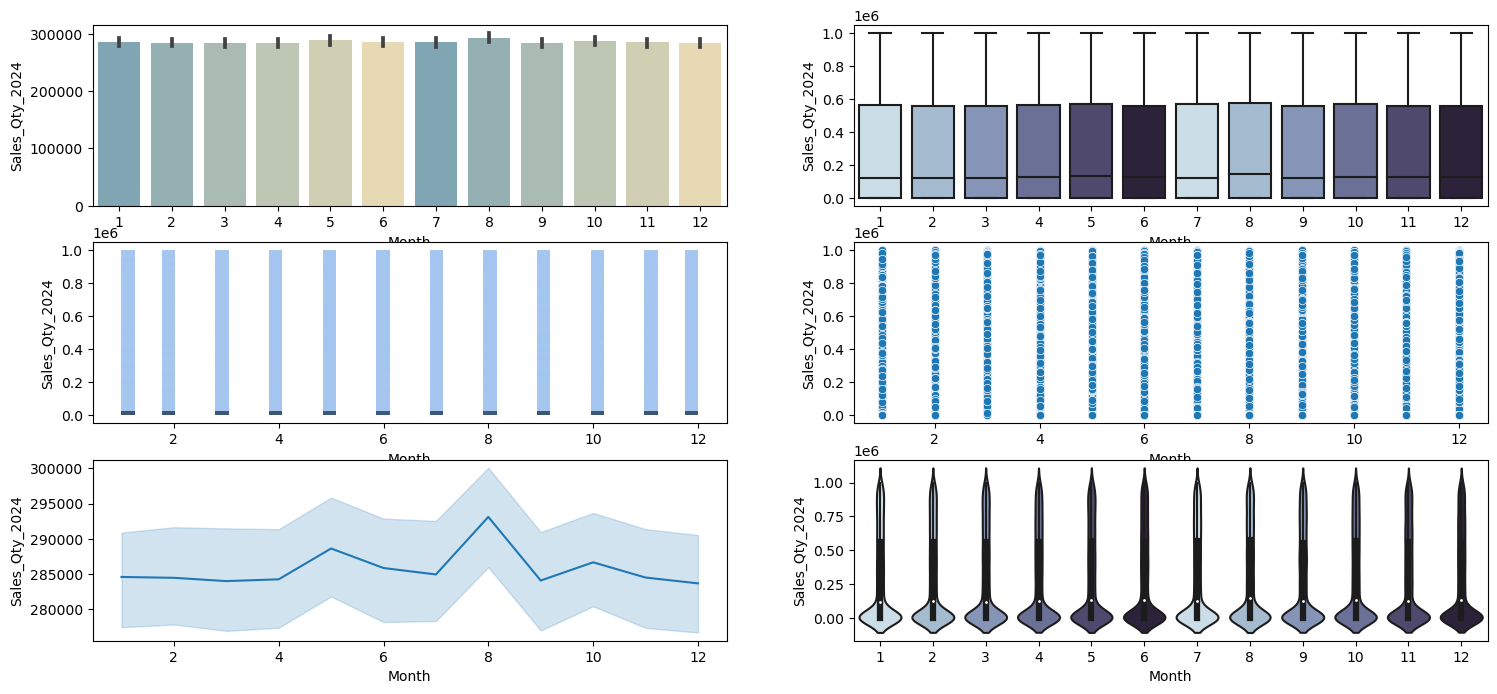

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


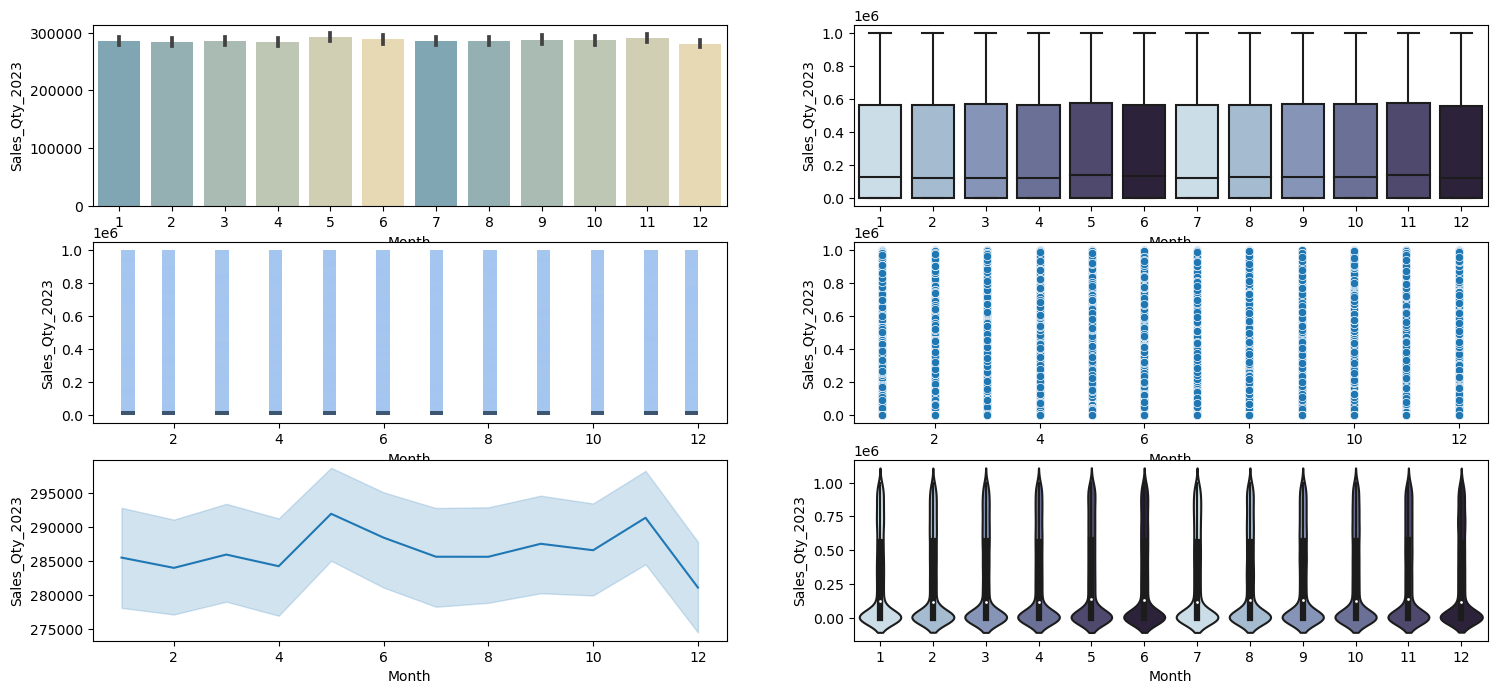

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


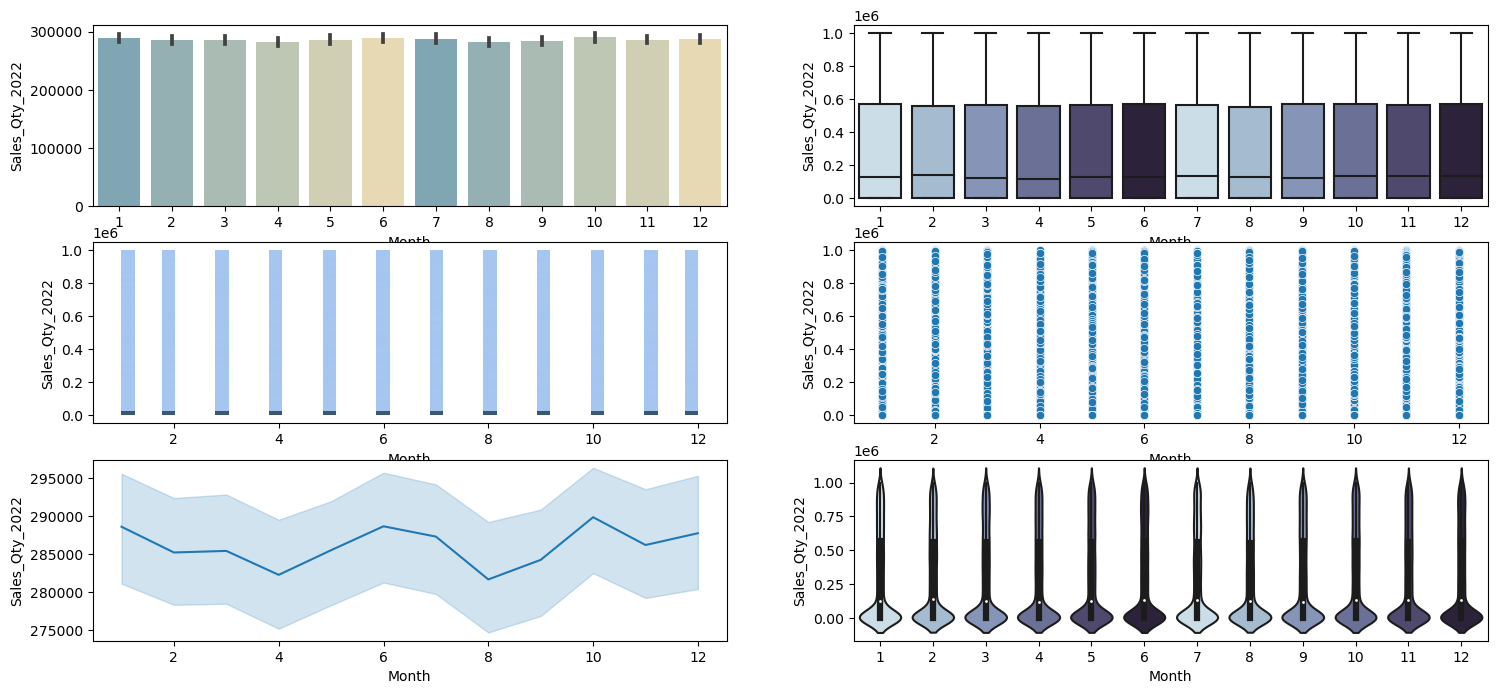

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


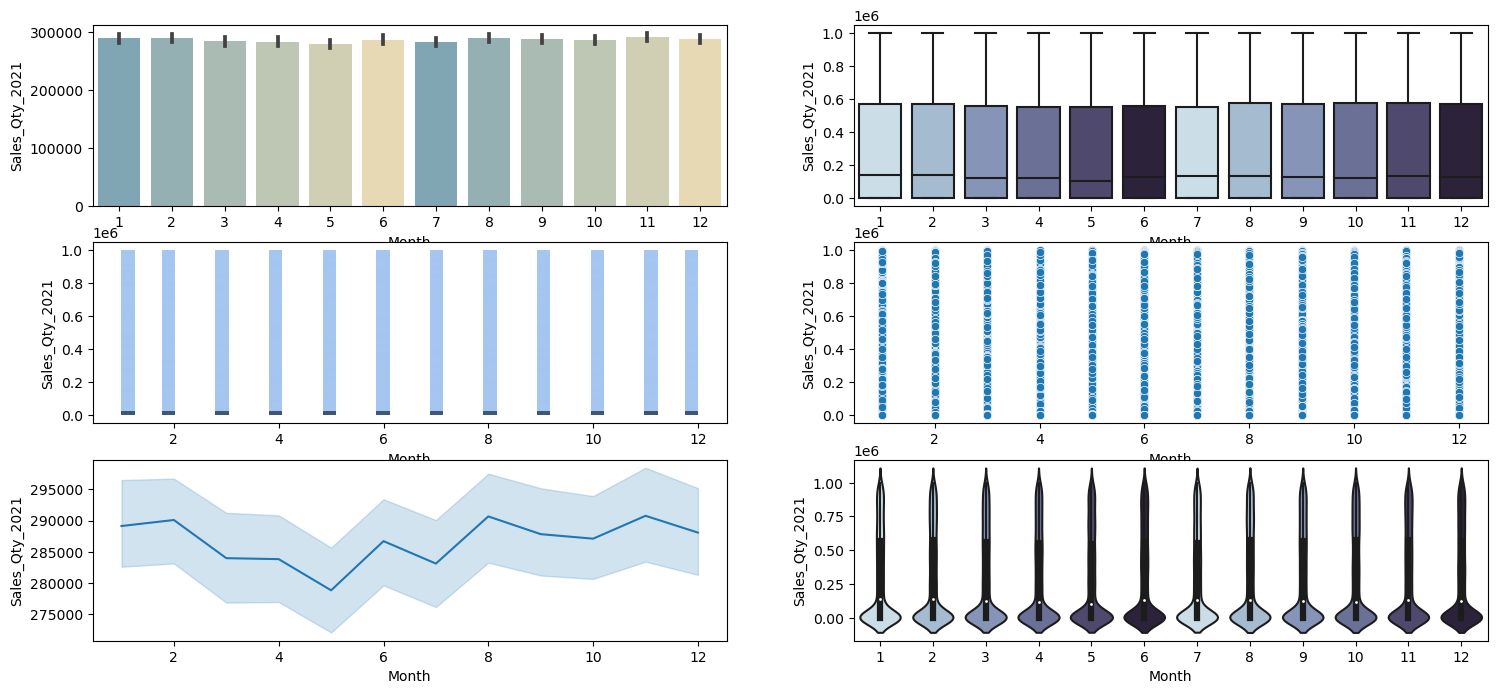

In [50]:
# ventas en toneladas (columnas Sales_Qty)

for col in ton_sales:
    sea_figures(df_sales, "Month", col)
    plt.show()

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


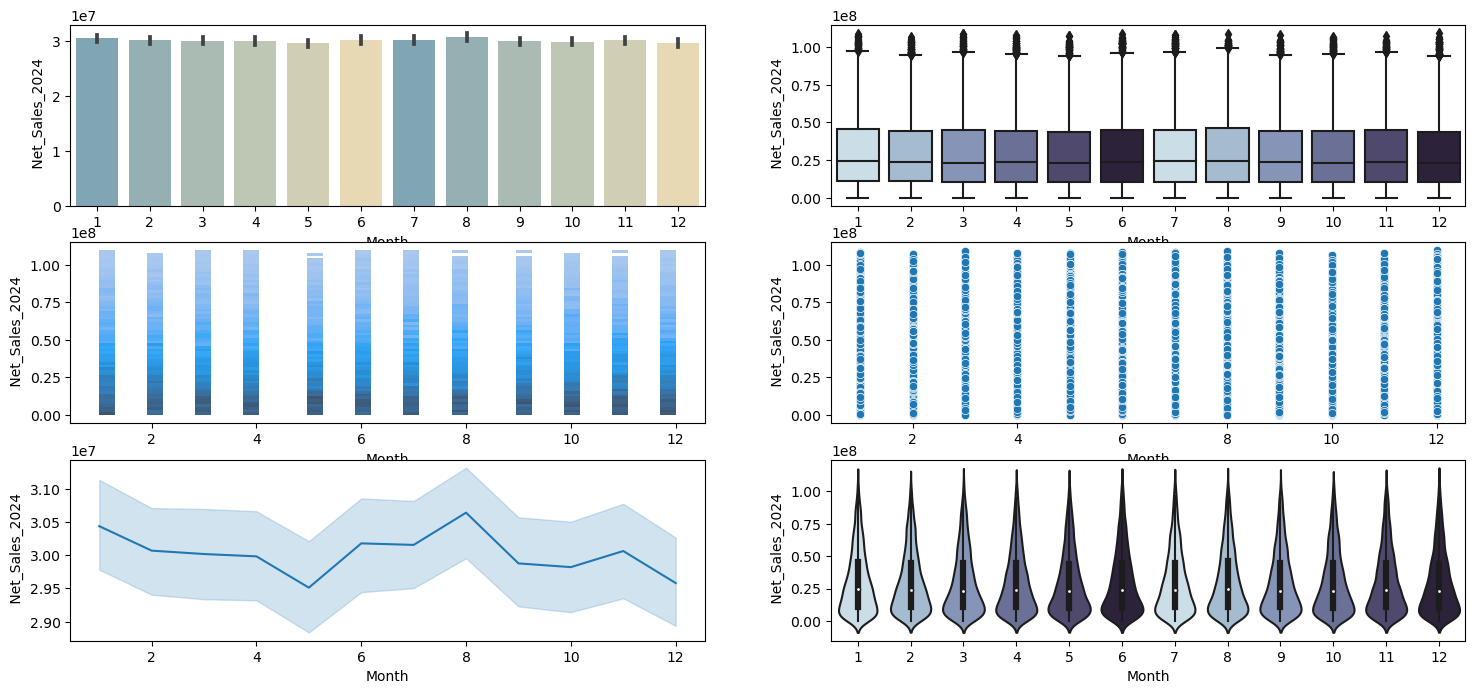

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


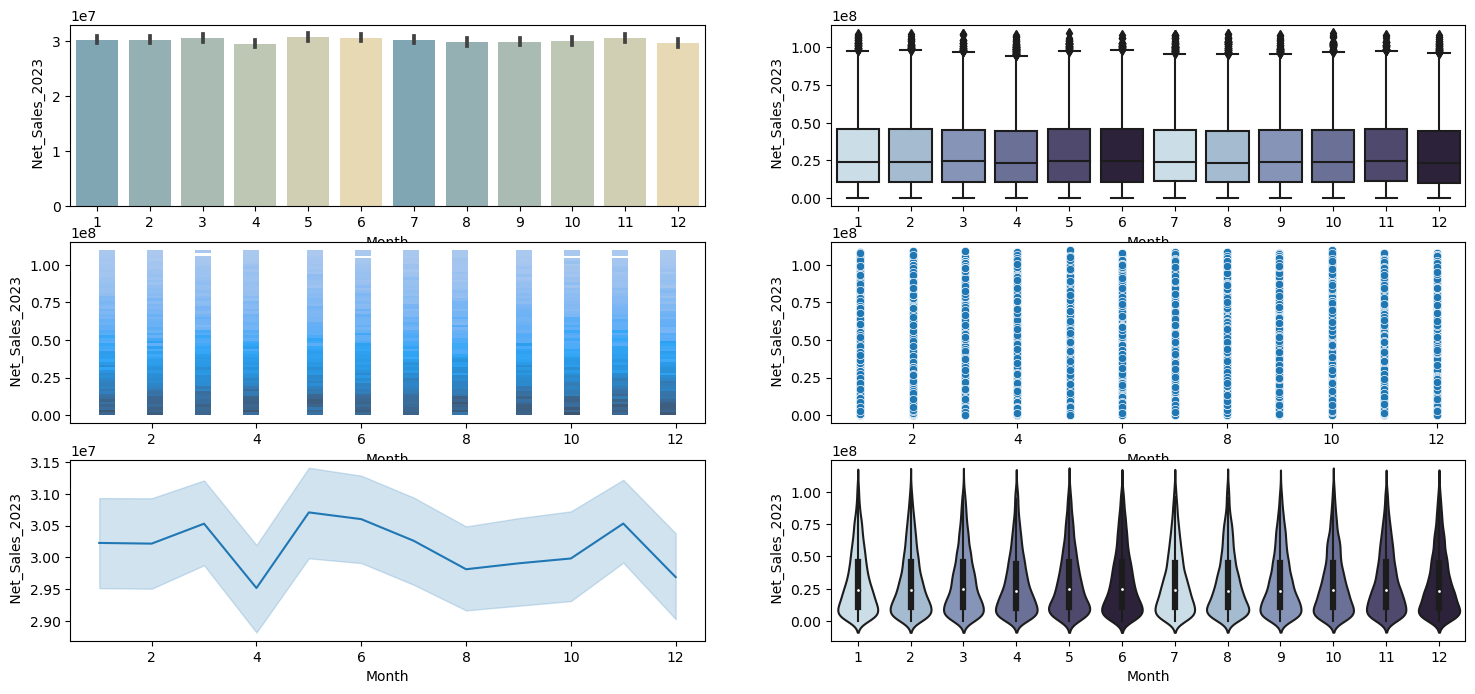

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


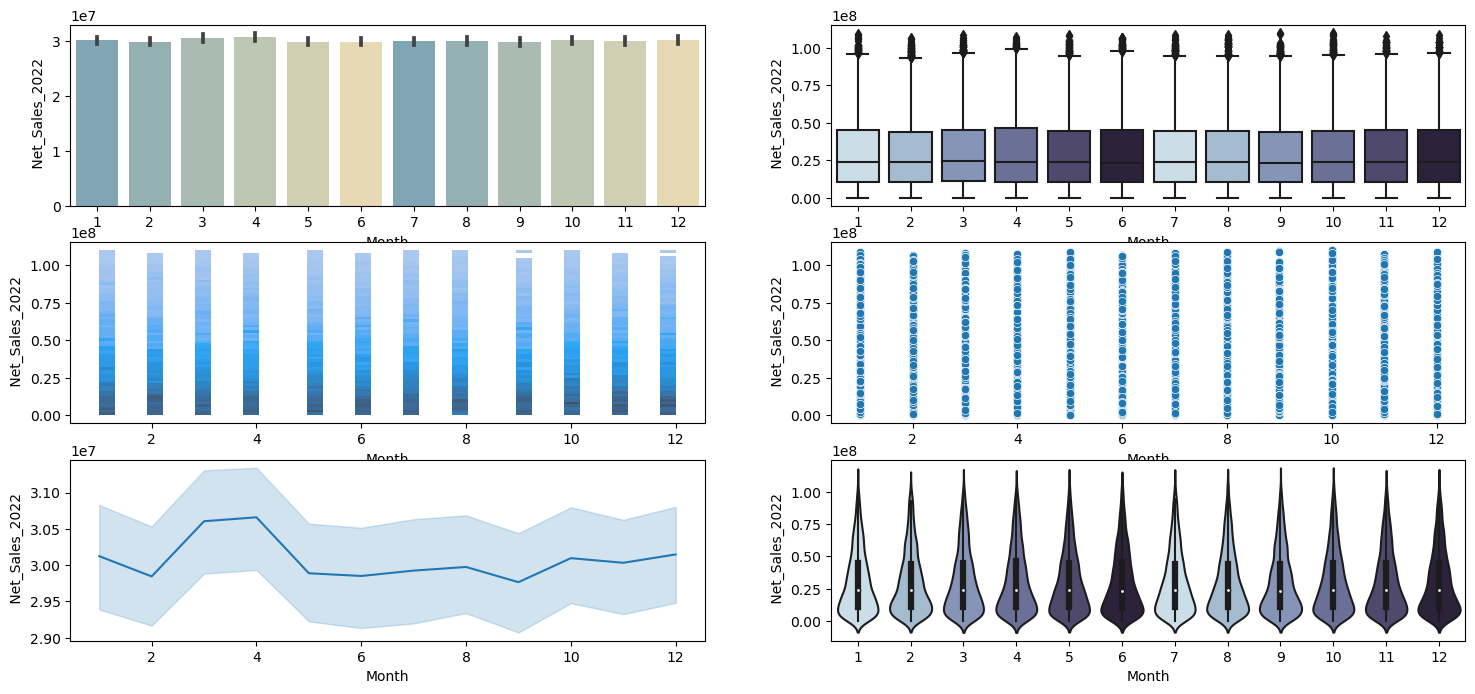

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


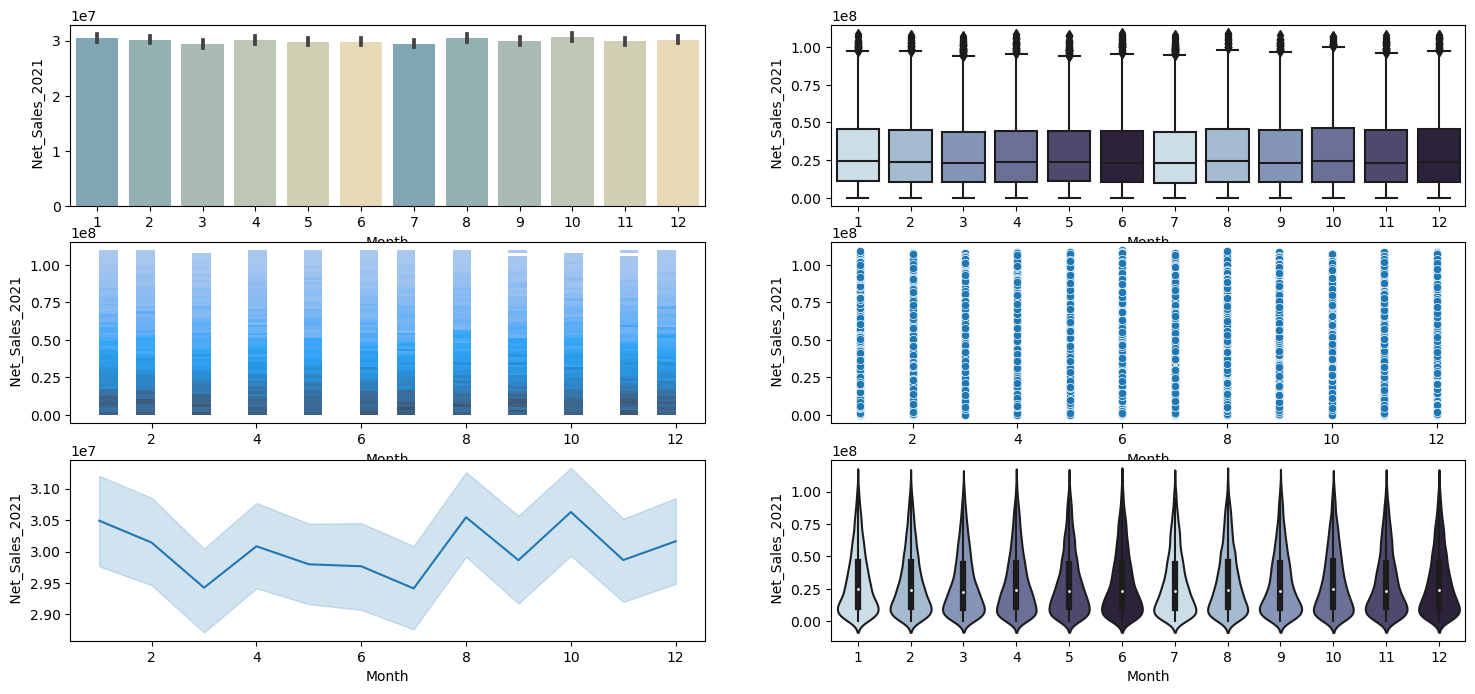

In [51]:
# ventas netas (columnas Net_Sales)

for col in net_sales:
    sea_figures(df_sales, "Month", col)
    plt.show()

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


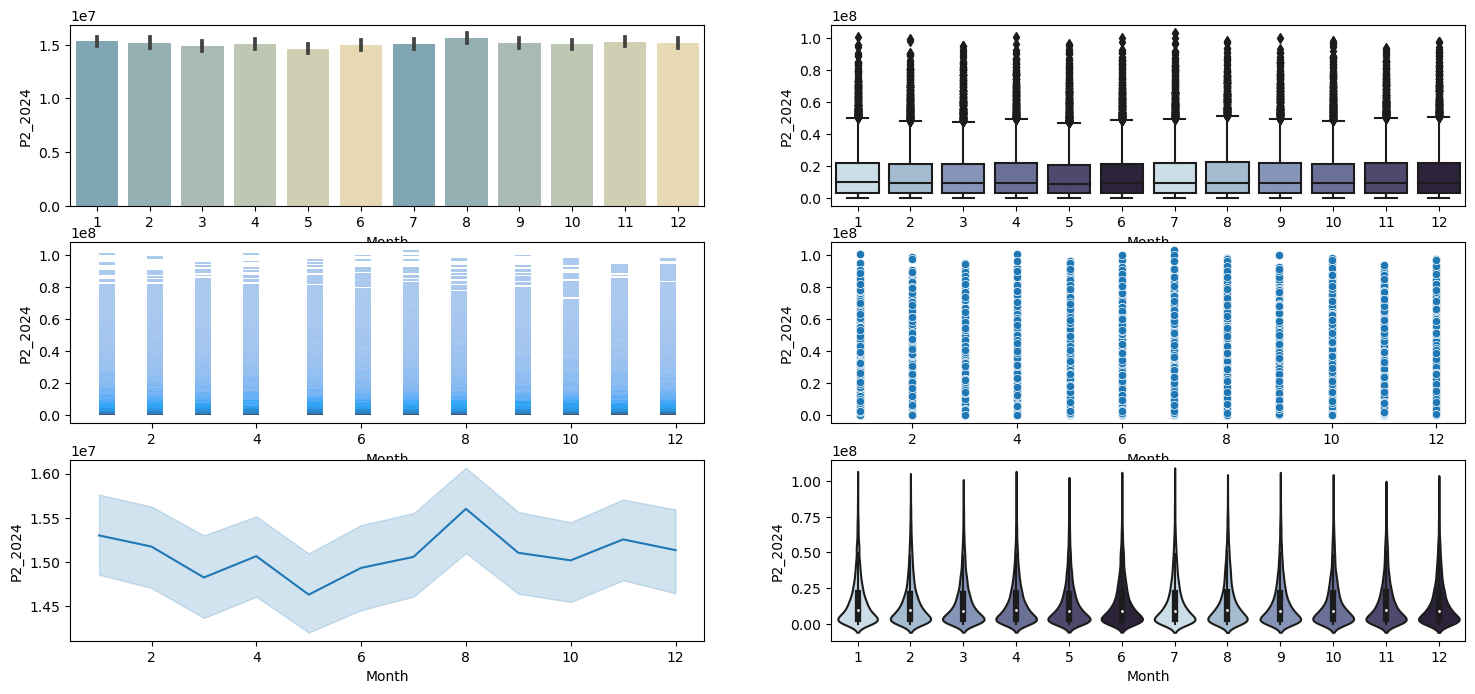

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


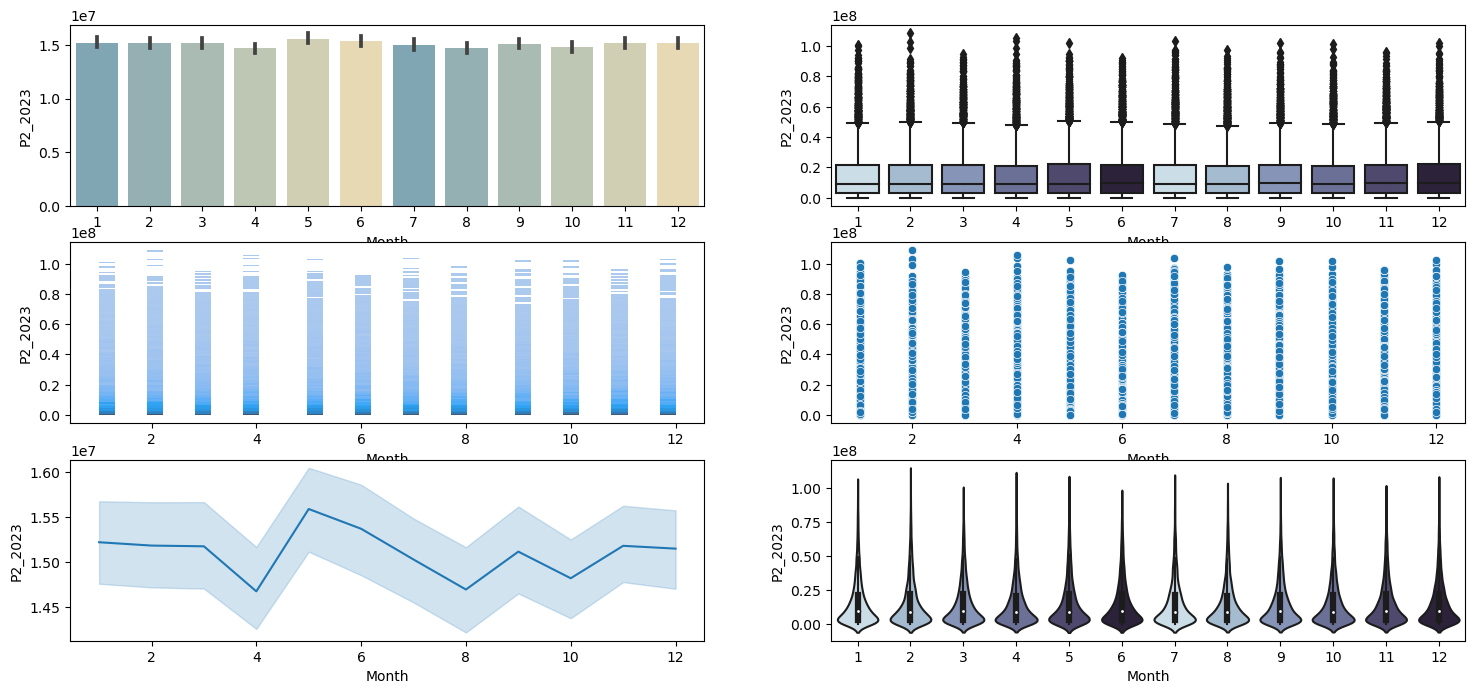

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


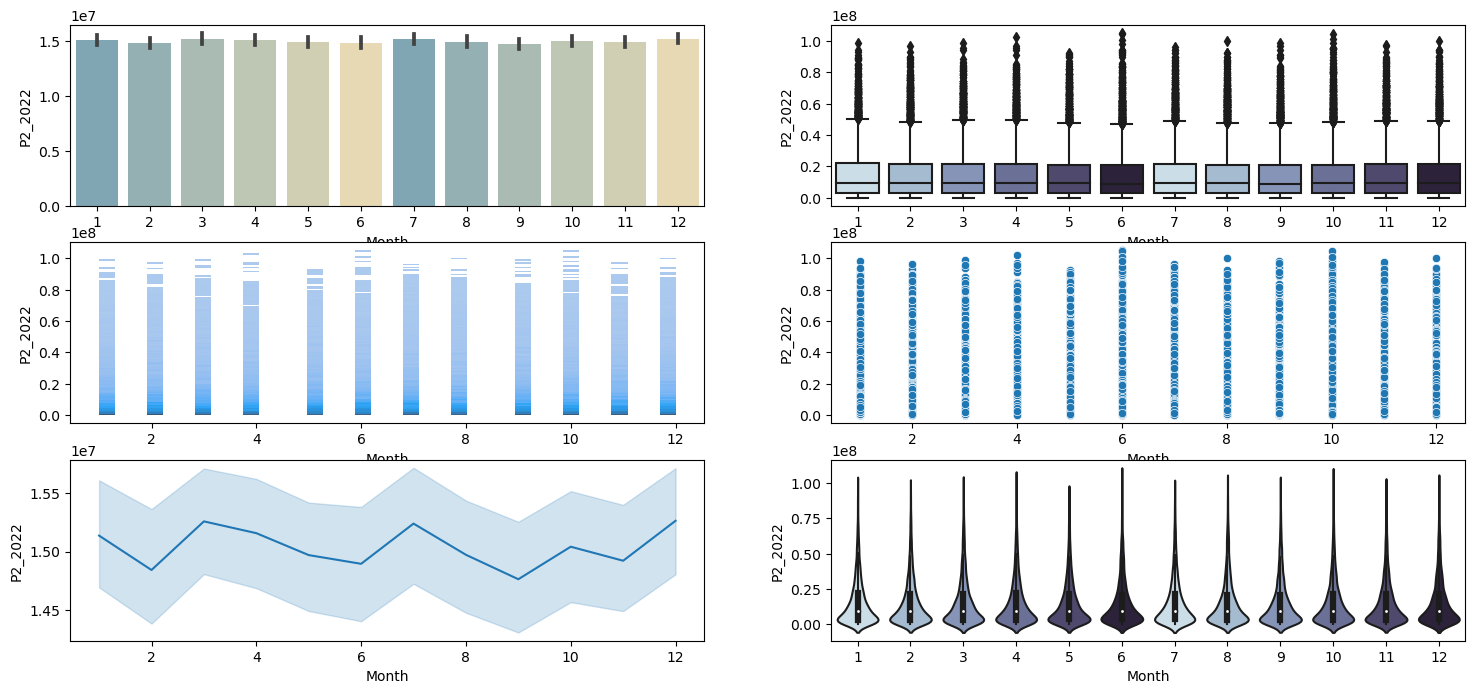

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


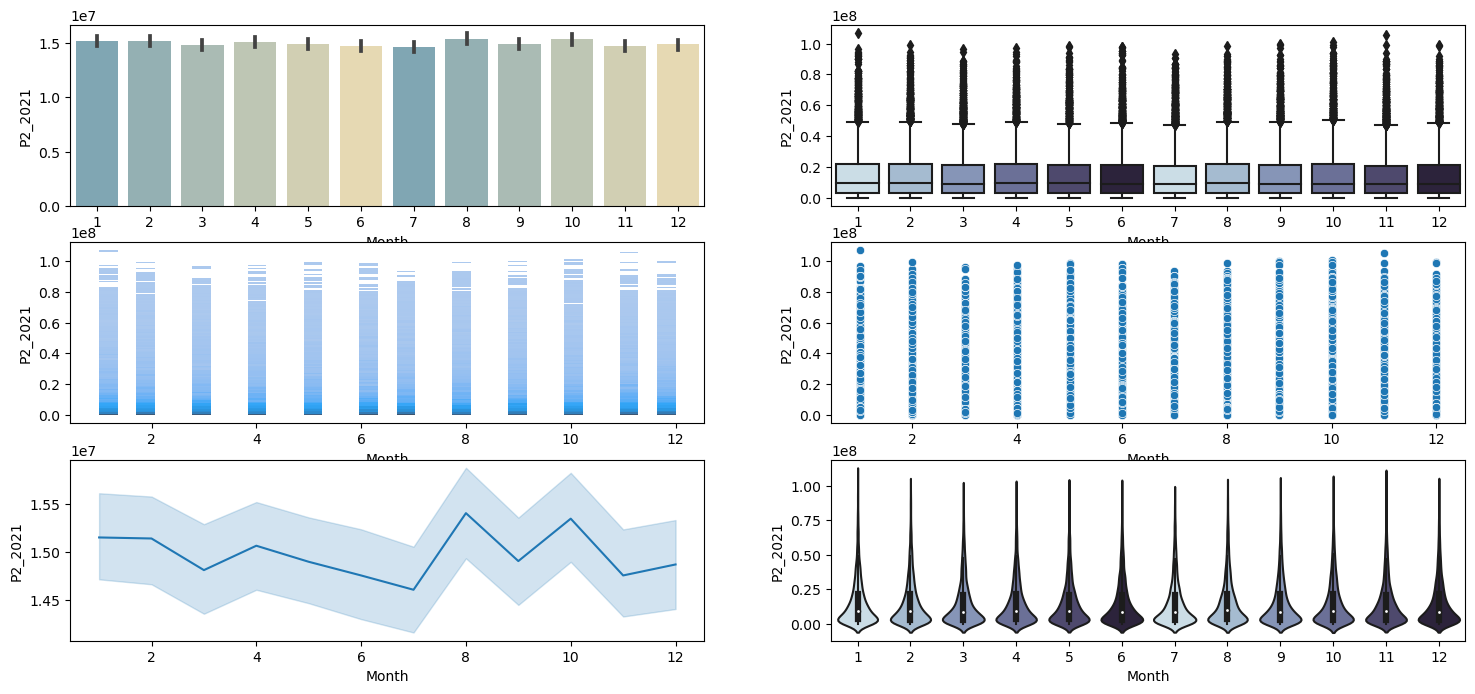

In [52]:
# margen de ventas (columnas Net_Sales)

for col in margin:
    sea_figures(df_sales, "Month", col)
    plt.show()

**Visualizacion de ventas por feature tags(Window)**

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


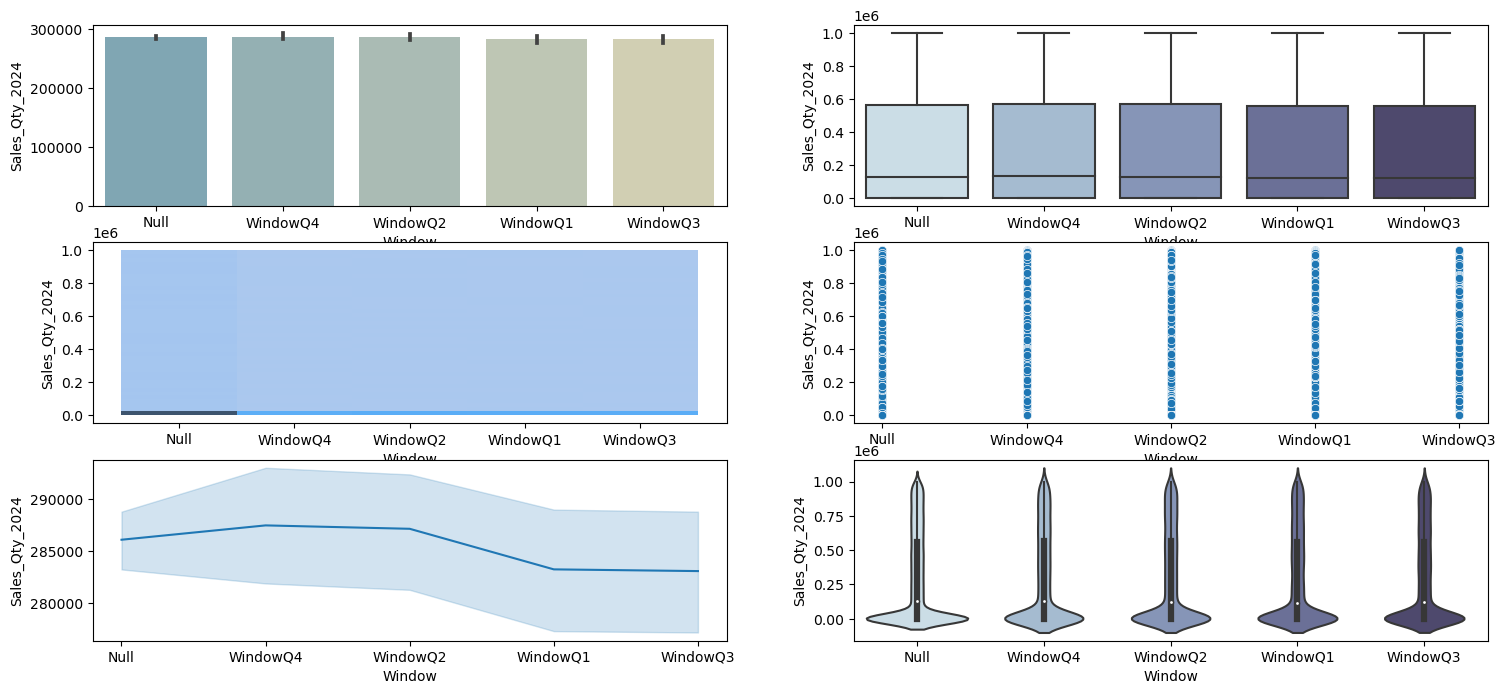

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


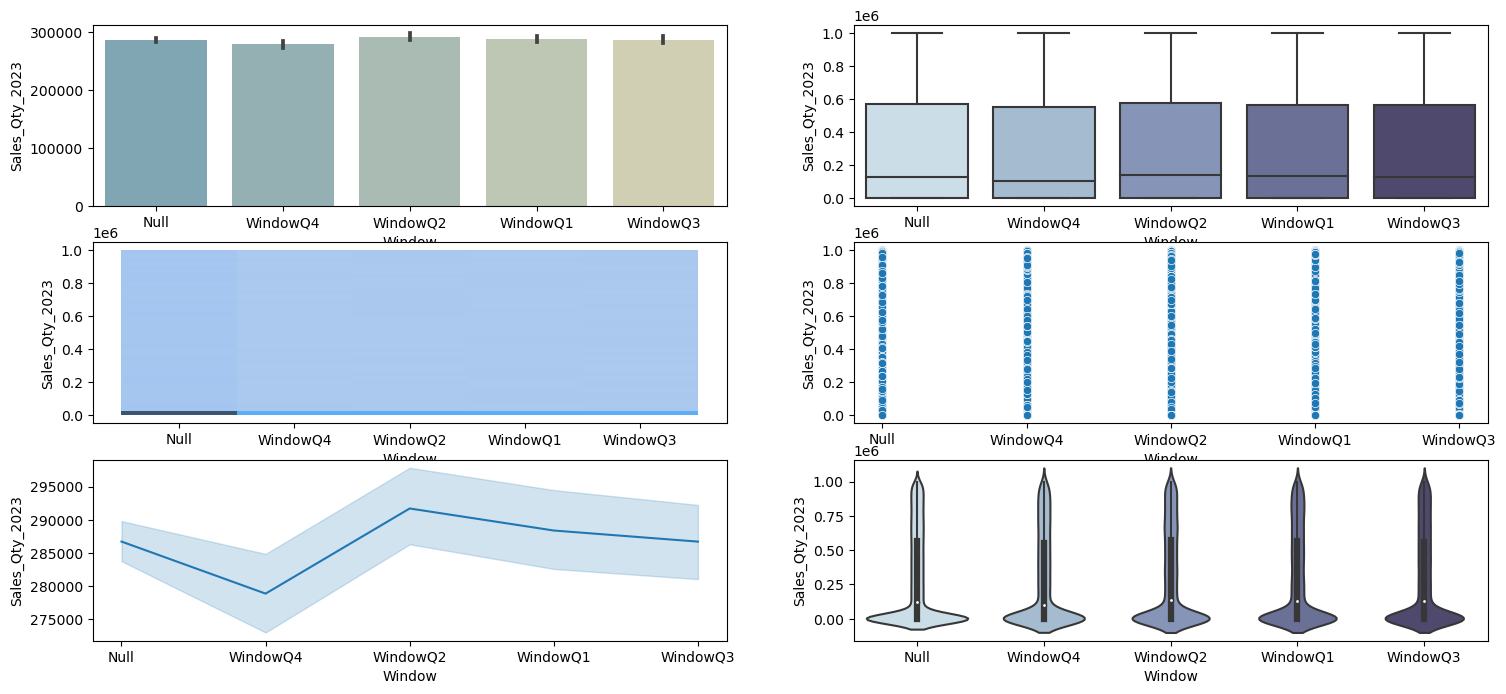

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


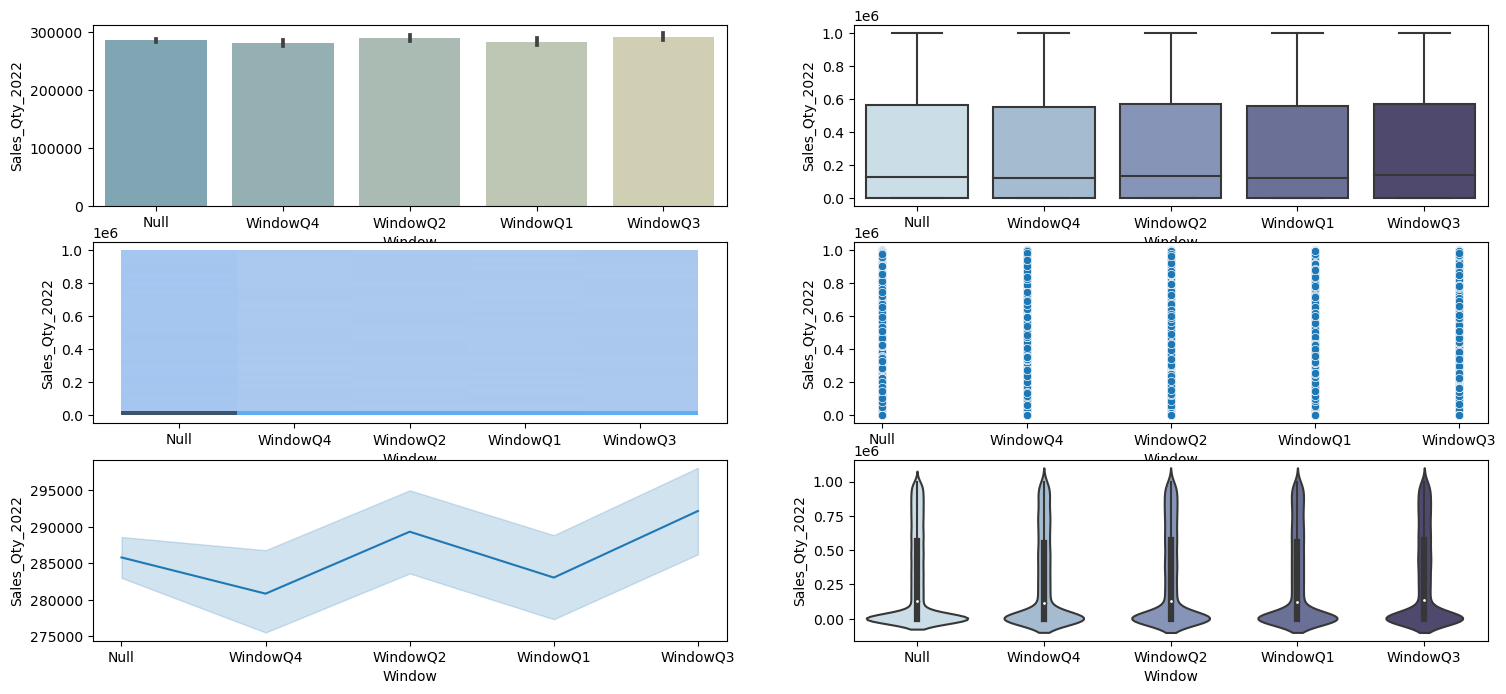

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


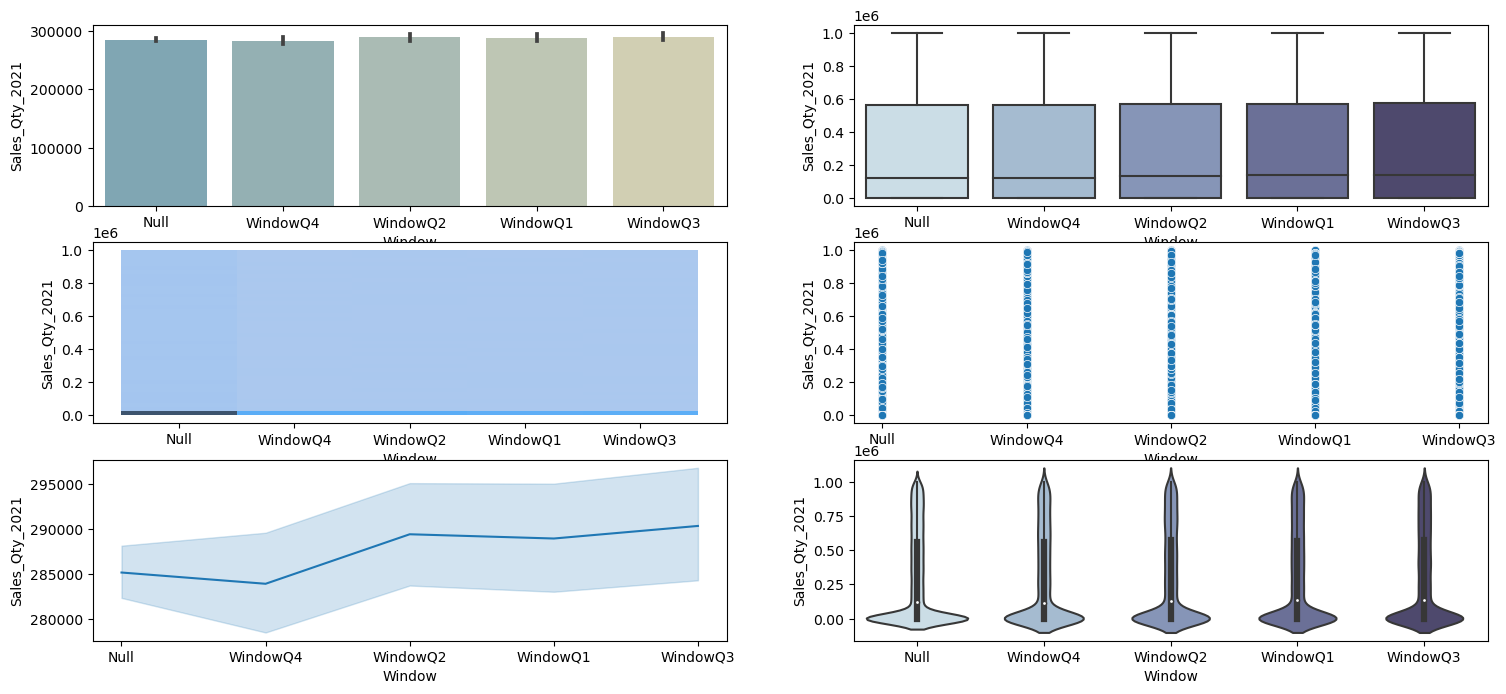

In [54]:
 # window vs ton
for col in ton_sales:
    sea_figures(df_sales, "Window", col)
    plt.show()

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


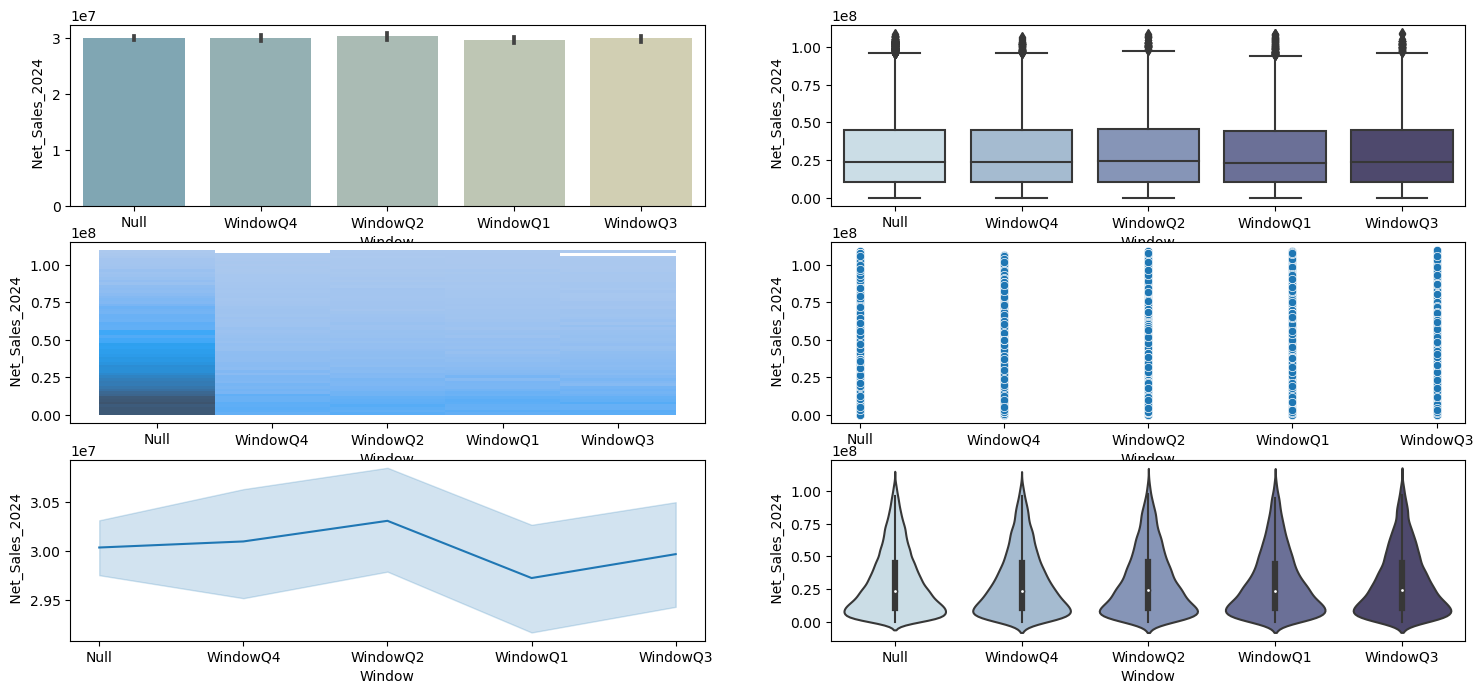

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


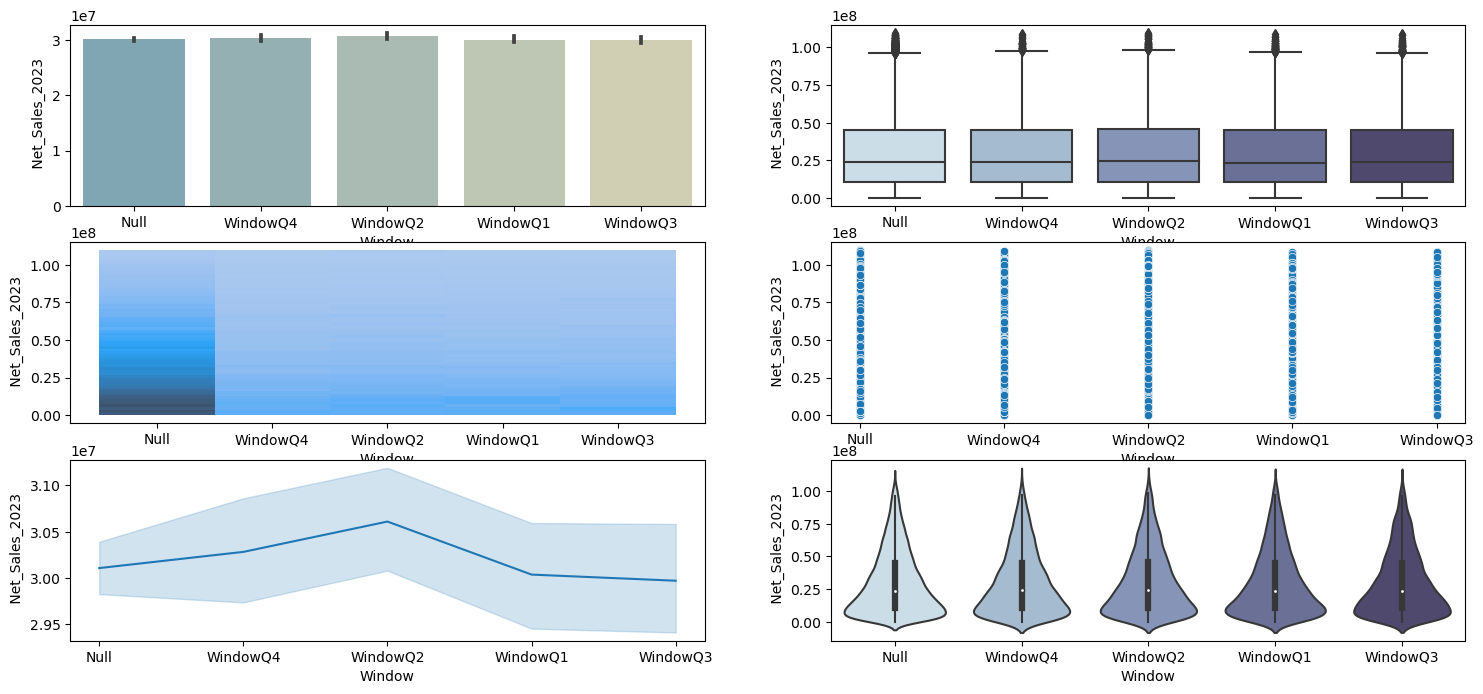

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


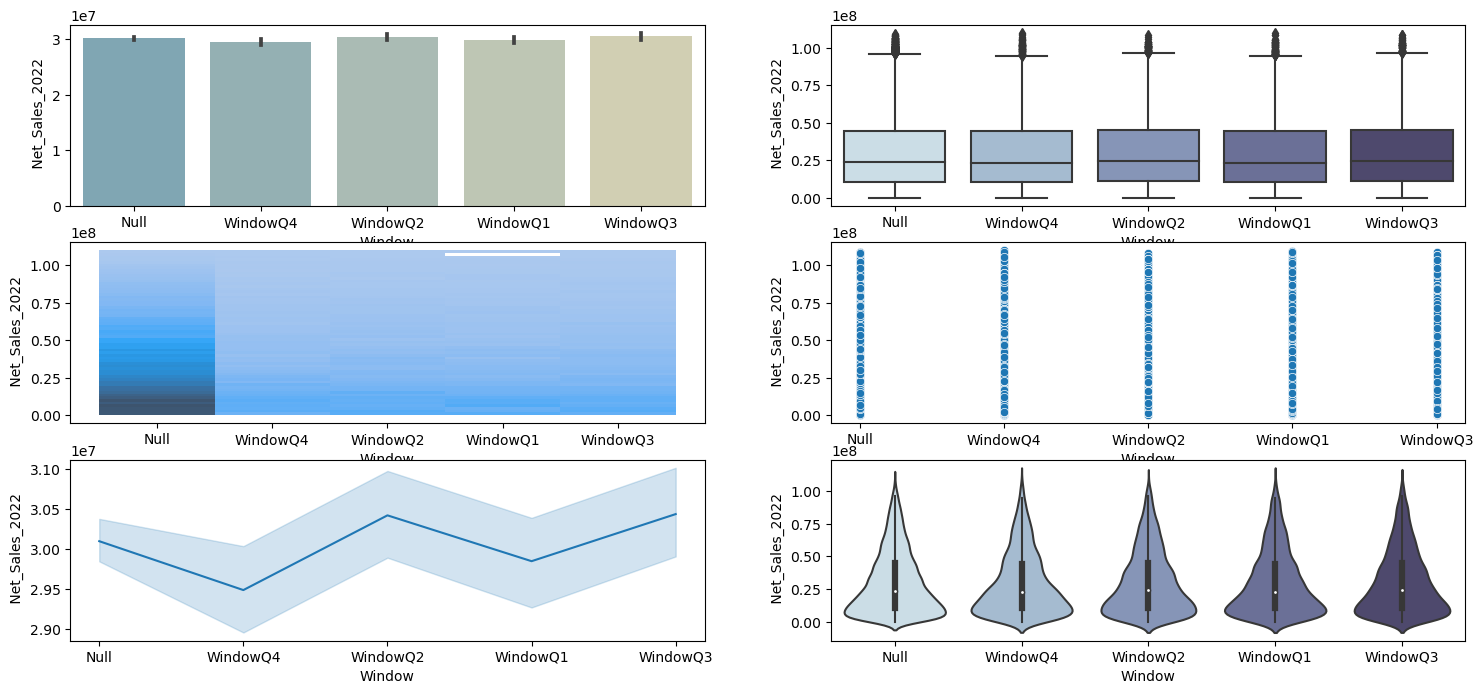

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


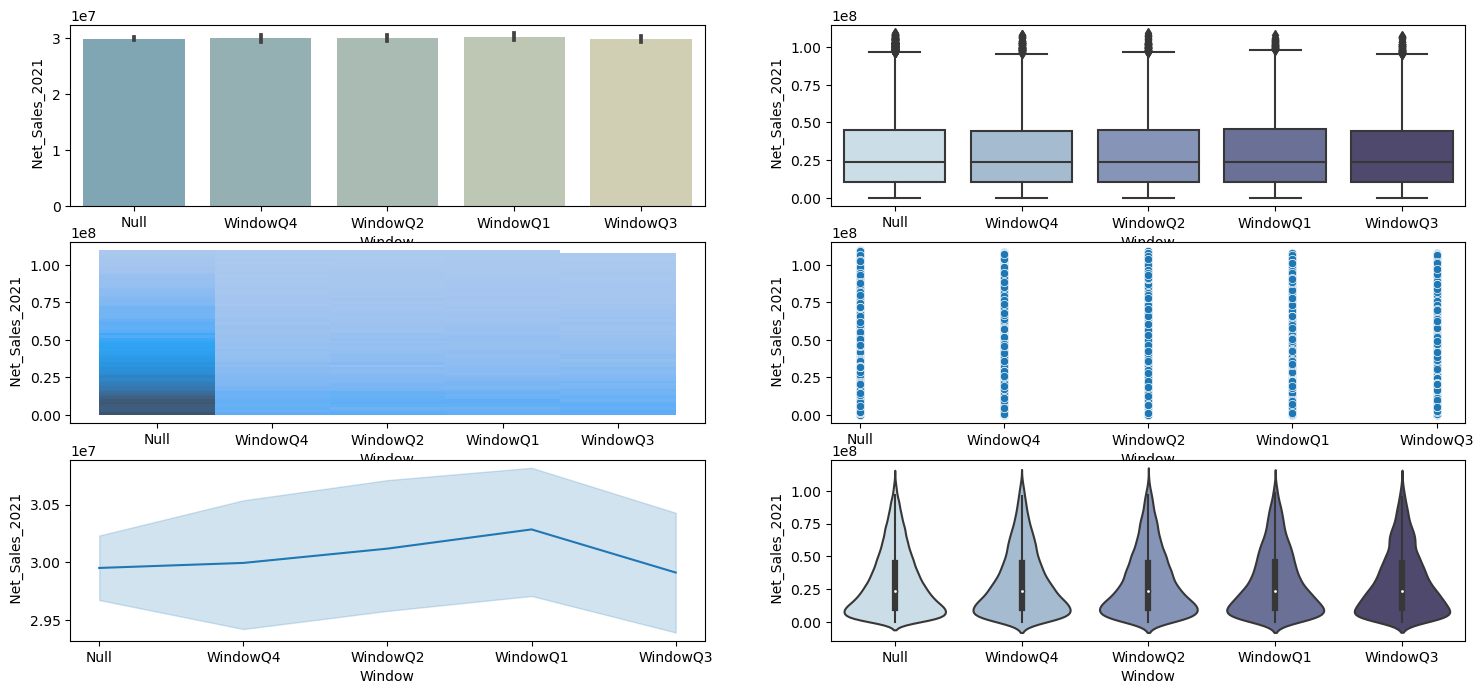

In [55]:
 # window vs net sales
for col in net_sales:
    sea_figures(df_sales, "Window", col)
    plt.show()

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


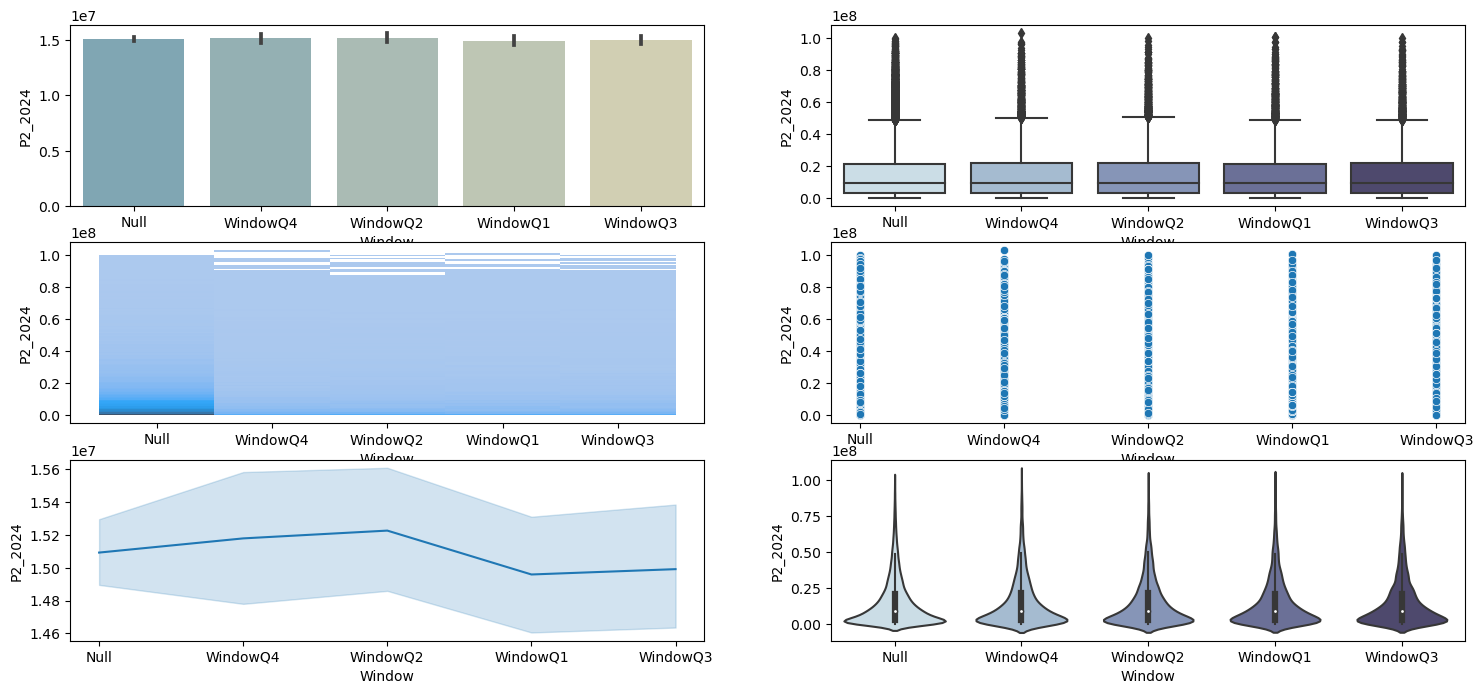

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


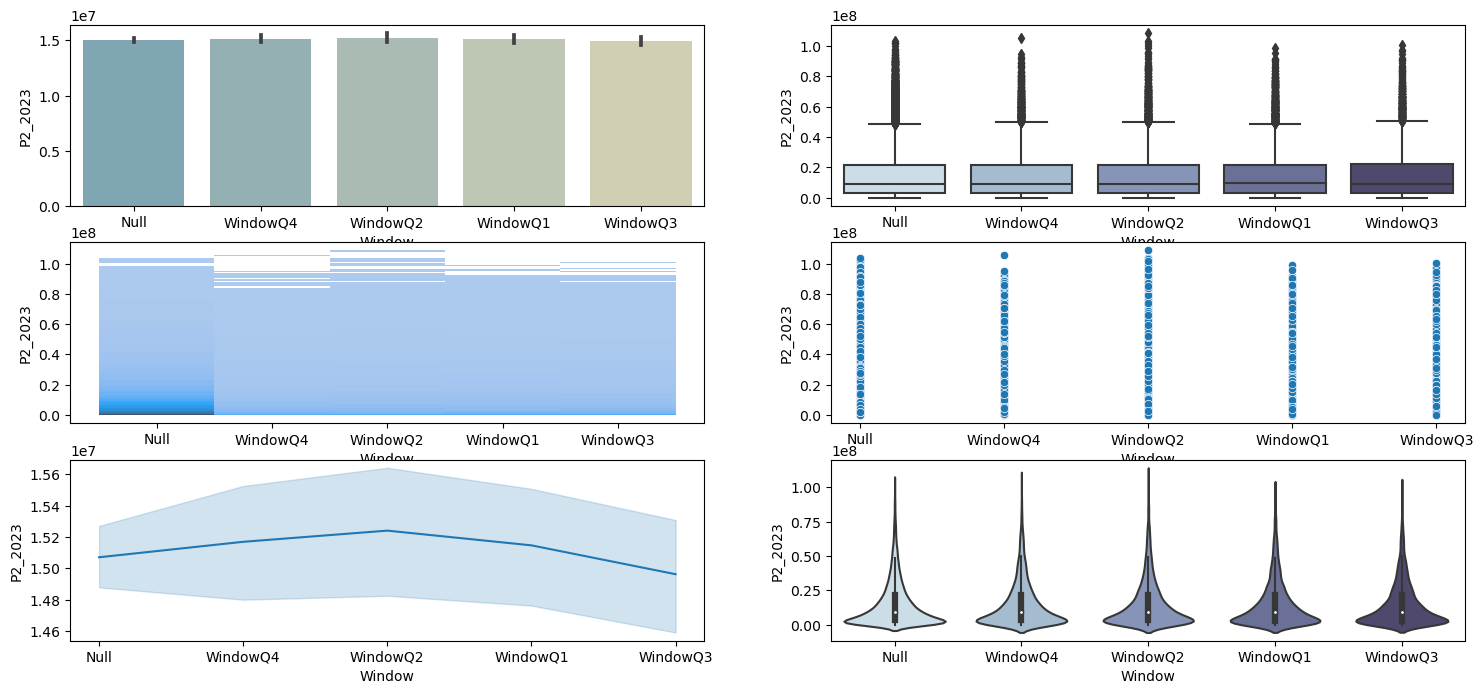

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


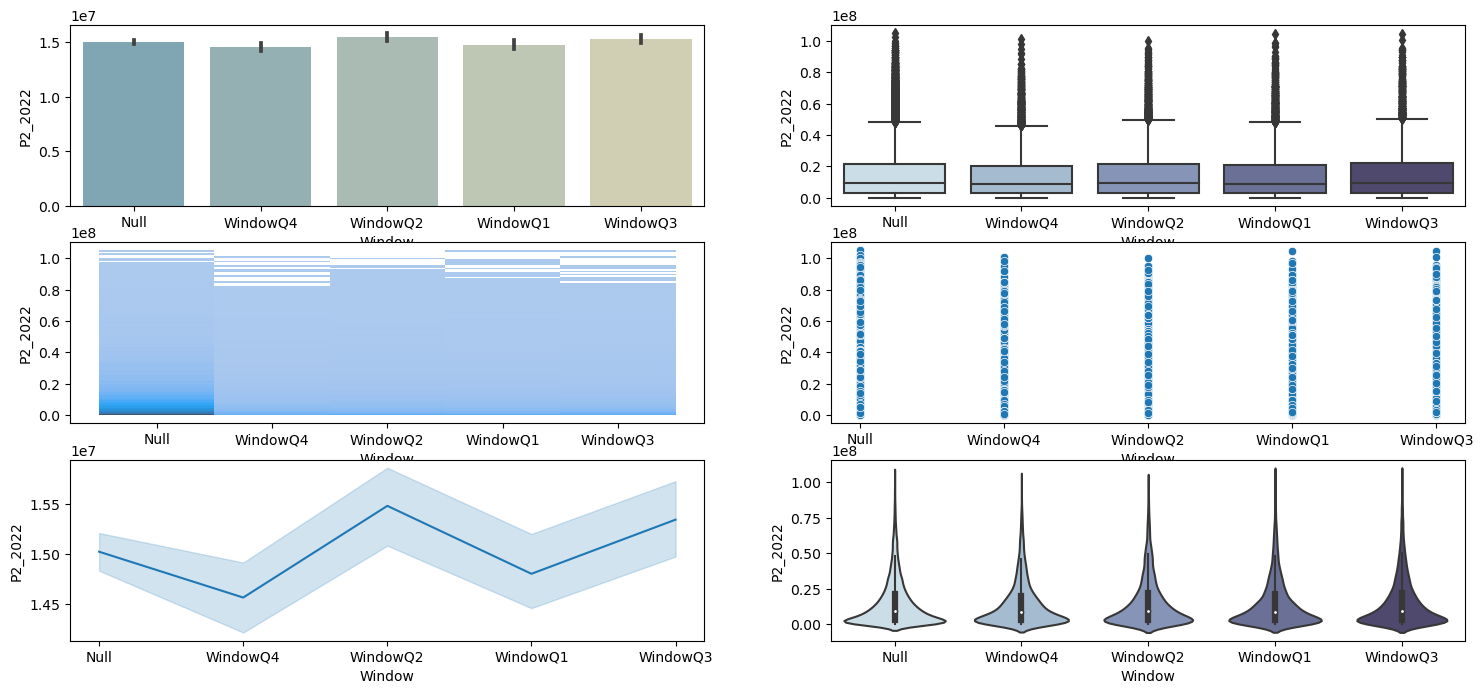

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


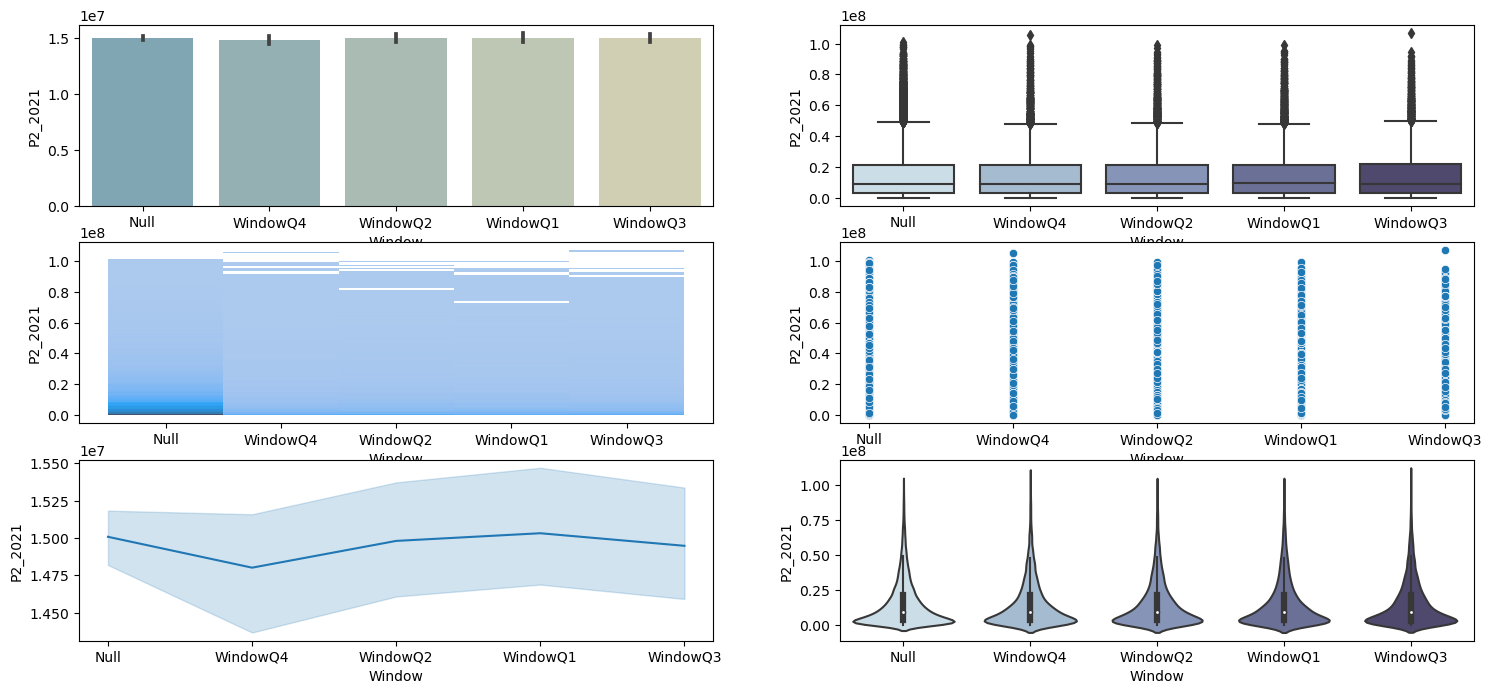

In [56]:
 # window vs margin
for col in margin:
    sea_figures(df_sales, "Window", col)
    plt.show()

**Visualizacion de ventas por materiales (MATERIAL)**

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


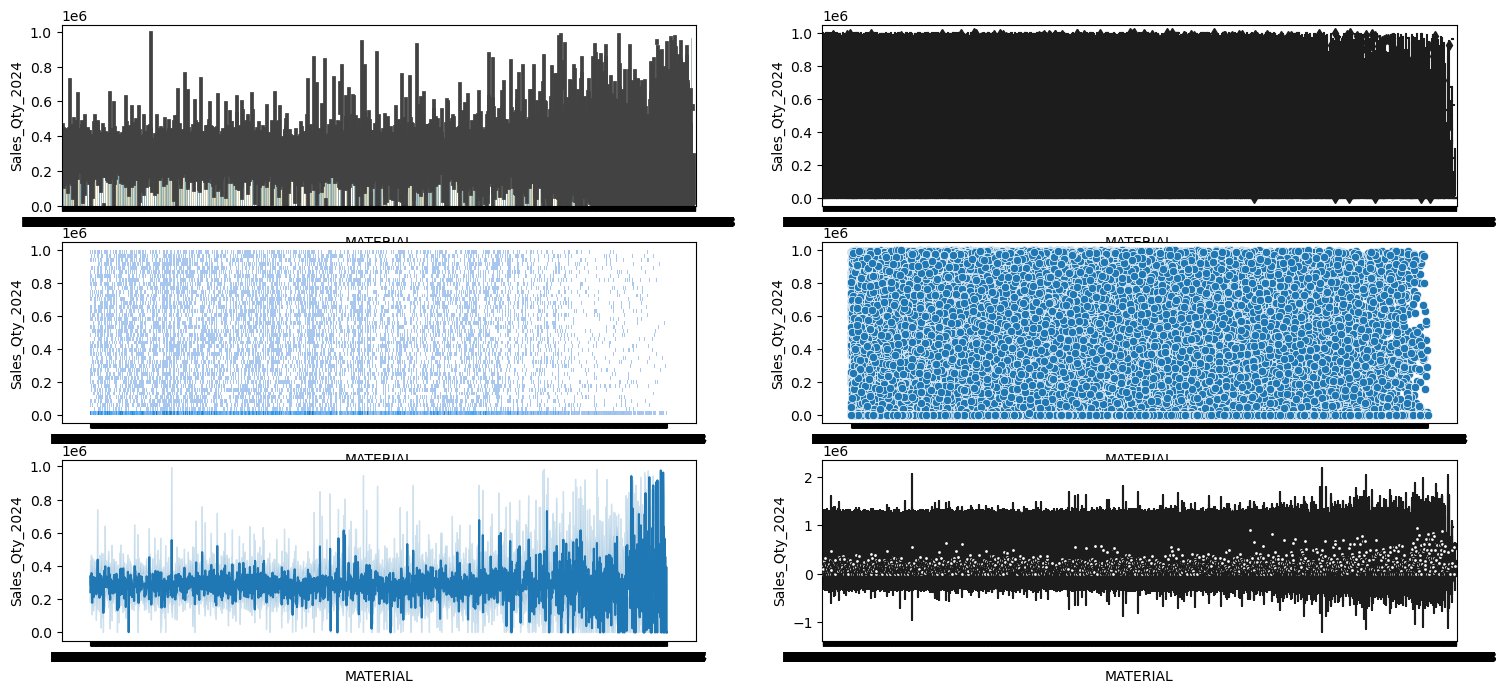

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


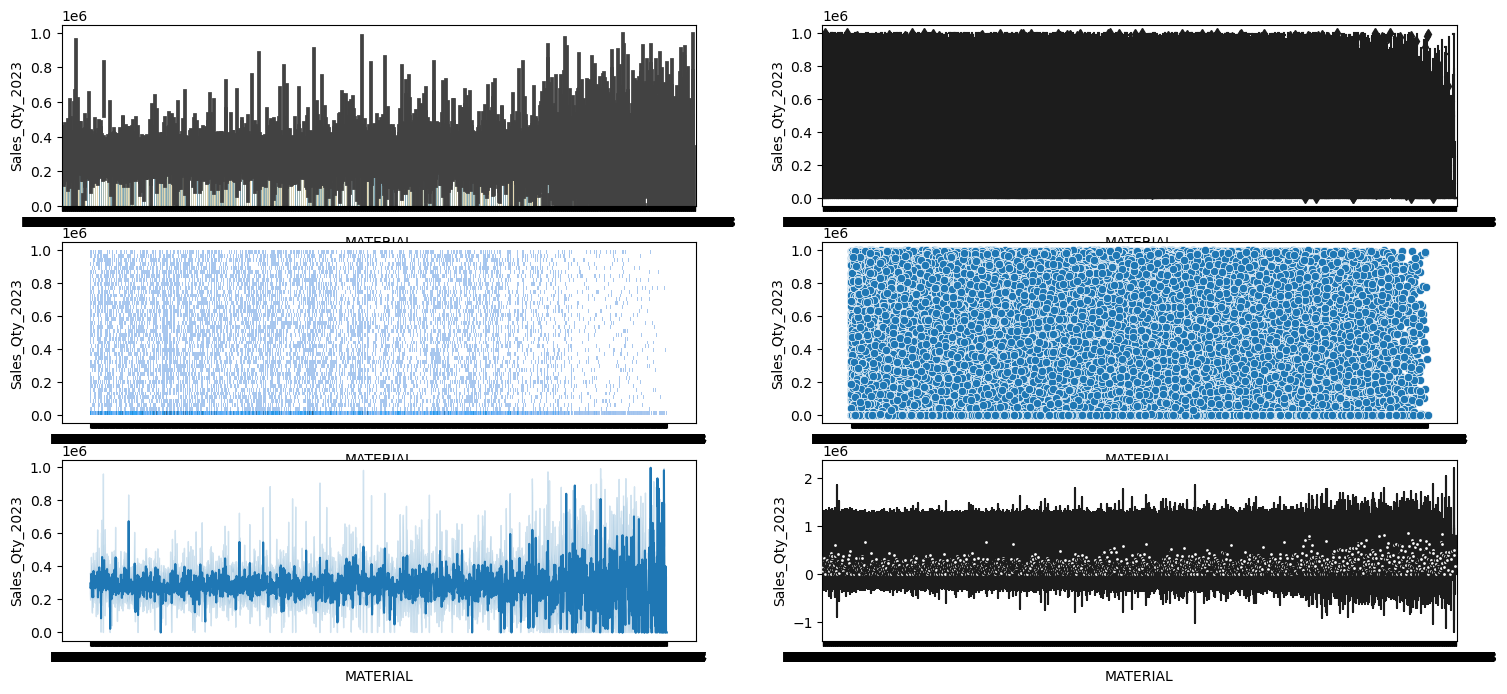

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


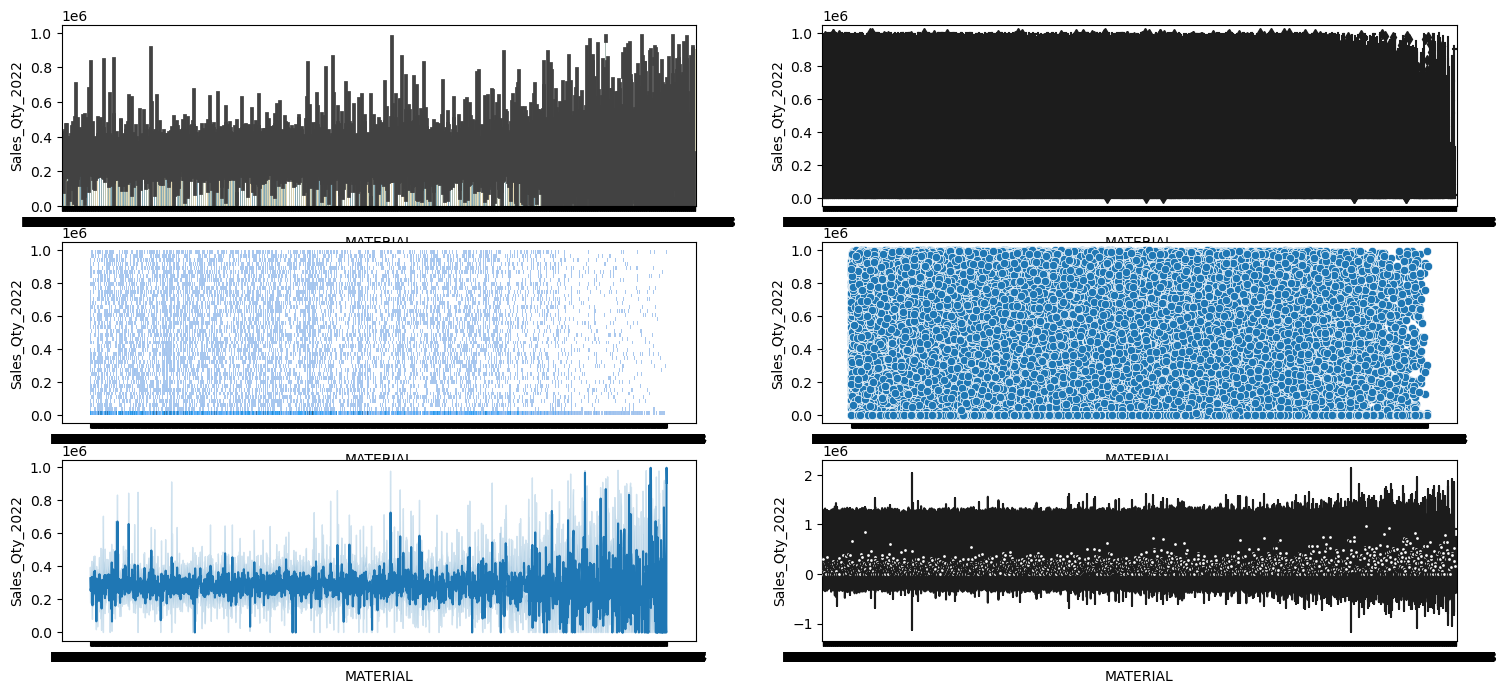

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


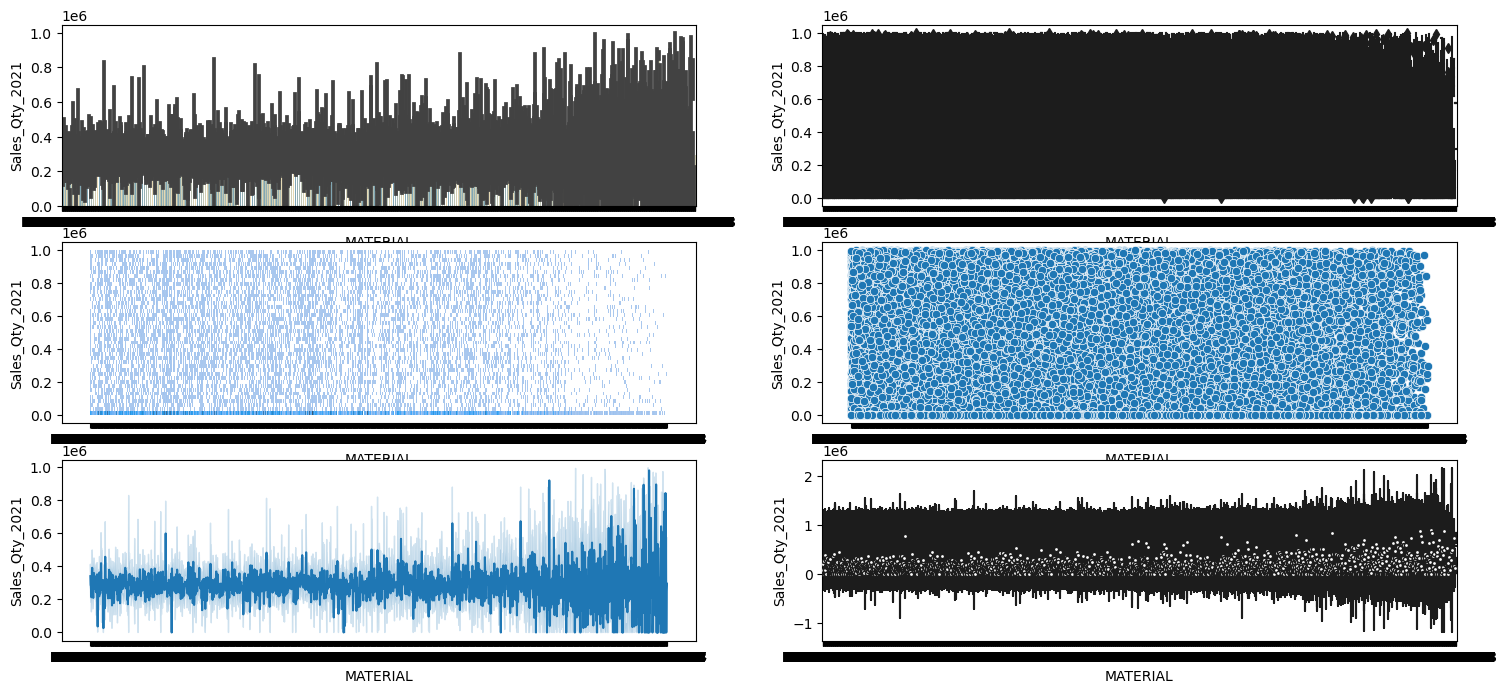

In [57]:
 # material vs ton
#for col in ton_sales:
#    sea_figures(df_sales, "MATERIAL", col)
#    plt.show()

In [ ]:
 # material vs net sales
#for col in net_sales:
#    sea_figures(df_sales, "MATERIAL", col)
#    plt.show()

In [ ]:
 # material vs margin
#for col in margin:
#    sea_figures(df_sales, "MATERIAL", col)
#    plt.show()

**Sales visualisation by address (Ship to Customer)**

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


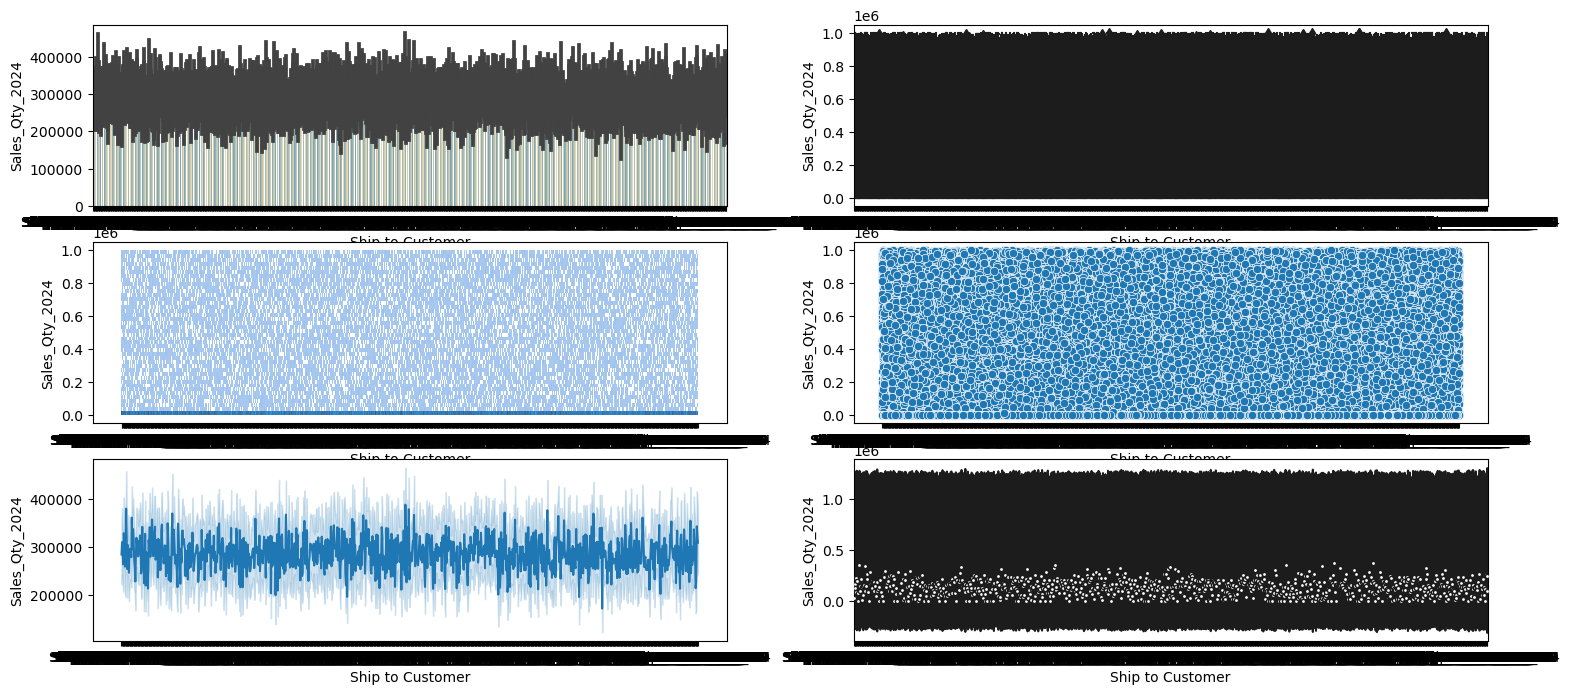

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


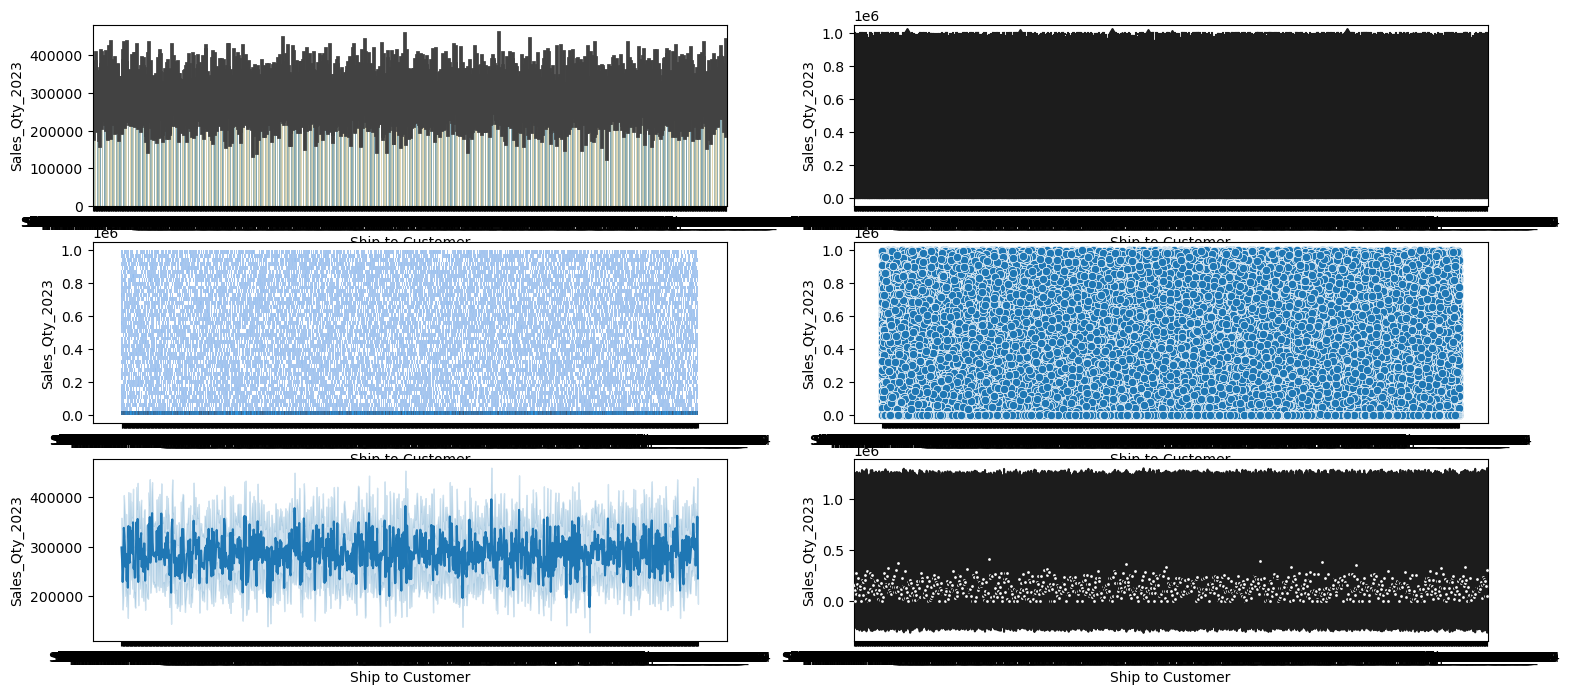

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


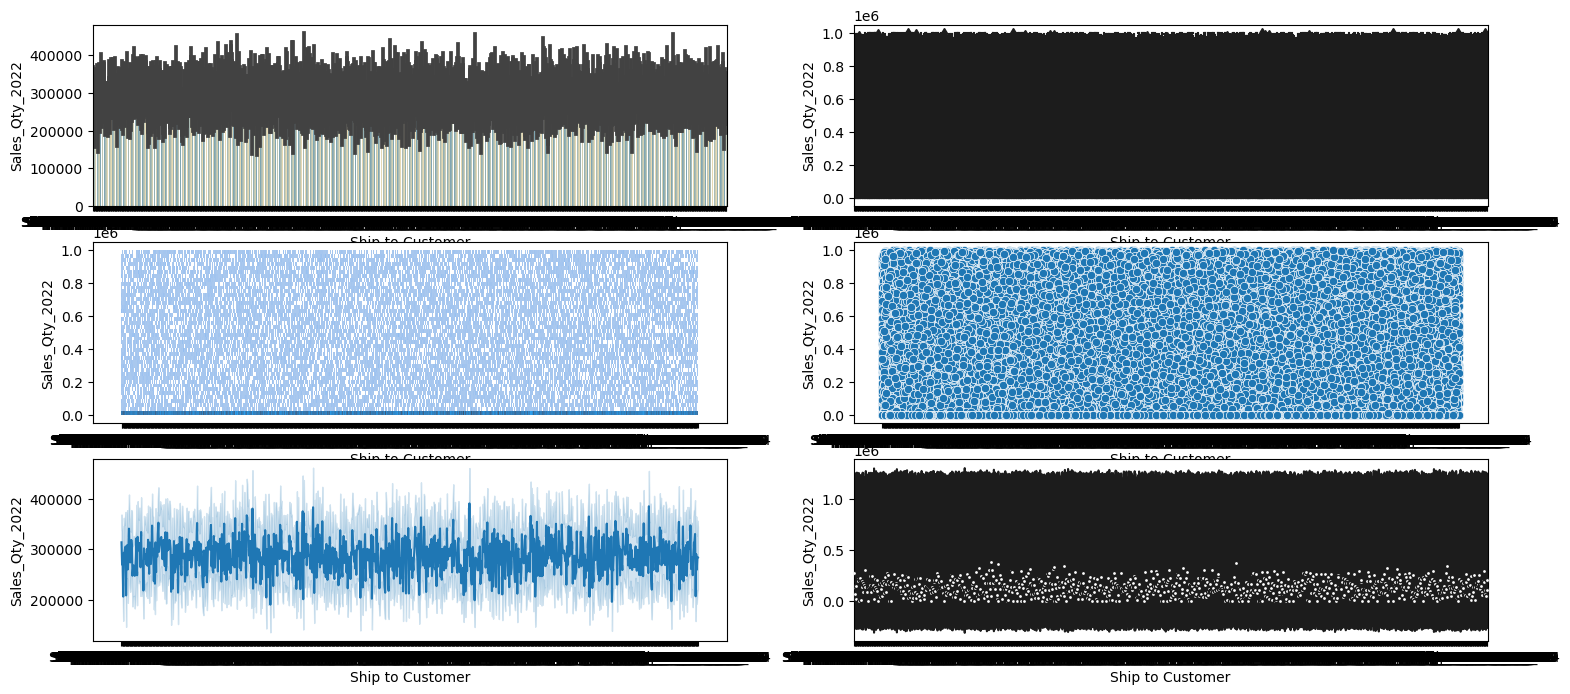

C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\fefys\AppData\Local\Temp\ipykernel_2584\2901211357.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


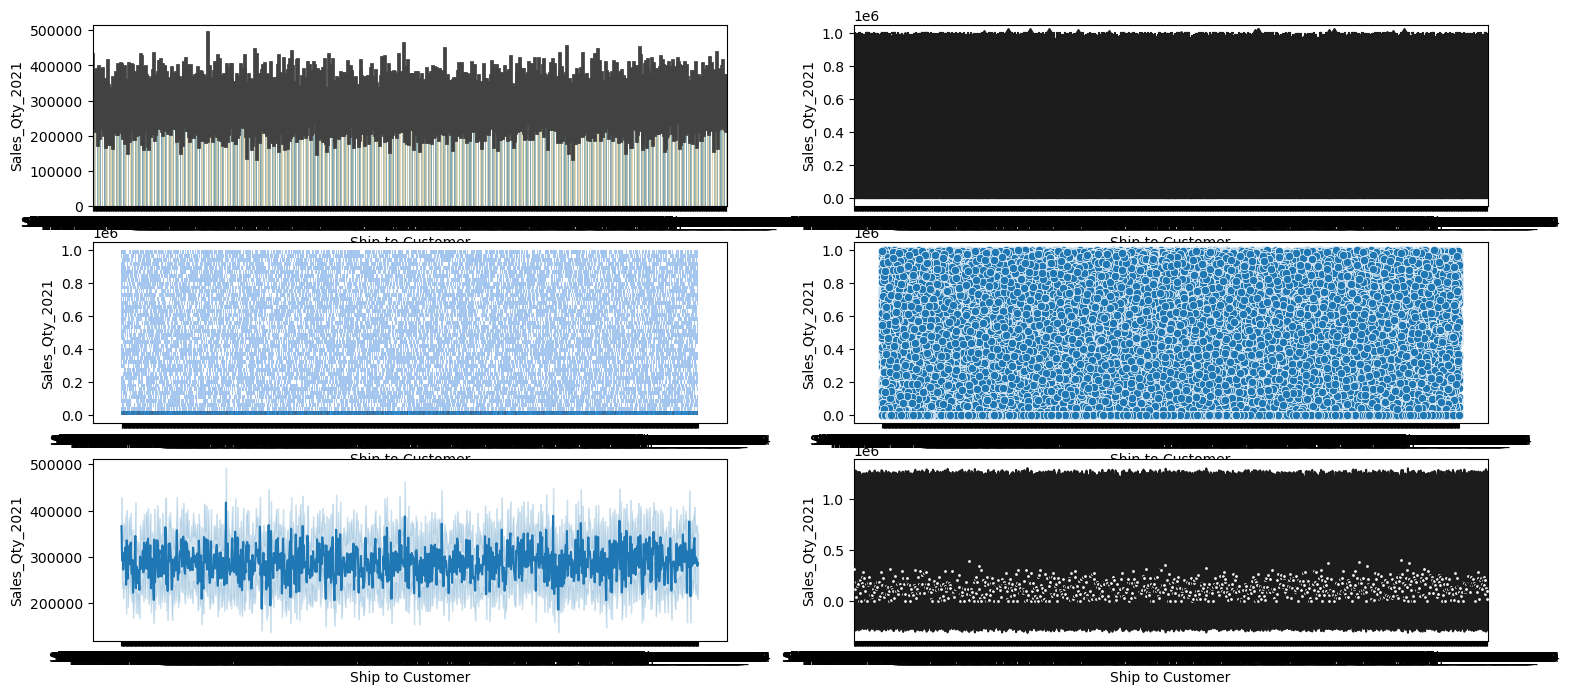

In [59]:
# invoice vs ton
#for col in ton_sales:
#    sea_figures(df_sales, 'Ship to Customer', col)
#    plt.show()

In [ ]:
# invoice vs net sales
#for col in net_sales:
#    sea_figures(df_sales, "Ship to Customer", col)
#    plt.show()

In [ ]:
# invoice vs margin
#for col in margin:
#    sea_figures(df_sales, "Ship to Customer", col)
#    plt.show()

In [60]:
df_jerarquia.head(3)

MATERIAL       BRAND      SUB_BRAND
0  MAT000001  Brand_5912  Sub_Brand_119
1  MAT000002  Brand_6081   Sub_Brand_93
2  MAT000003  Brand_3478  Sub_Brand_107

In [61]:
df_jerarquia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MATERIAL   9999 non-null   object
 1   BRAND      9999 non-null   object
 2   SUB_BRAND  9999 non-null   object
dtypes: object(3)
memory usage: 234.5+ KB


In [62]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                100000 non-null  int64  
 1   Ship to Customer  100000 non-null  object 
 2   MATERIAL          100000 non-null  object 
 3   Window            100000 non-null  object 
 4   Other_Data        100000 non-null  object 
 5   Month             100000 non-null  int64  
 6   Sales_Qty_2024    100000 non-null  float64
 7   Sales_Qty_2023    100000 non-null  float64
 8   Sales_Qty_2022    100000 non-null  float64
 9   Sales_Qty_2021    100000 non-null  float64
 10   Net_Sales_2024   57094 non-null   float64
 11   Net_Sales_2023   57203 non-null   float64
 12   Net_Sales_2022   57146 non-null   float64
 13   Net_Sales_2021   57206 non-null   float64
 14  P2_2024           57094 non-null   float64
 15  P2_2023           57203 non-null   float64
 16  P2_2022           571

**Primeras observaciones**
* Los datos tienen el mismo comportamiento respecto de la columna de comparacion
    * No hay diferencias de distribucion
* Existen diferencias según el mes dentro de la comparacion temporal (hacer un test de estacionareidad)
* Existe capacidad de relacionar tablas, no se puede hacer directamente desde pandas por memoria
    * Hay que hacer una función con nuevas columnas en tablas con informacion numerica
* Cosas a revisar
    * correlación
    * estacionareidad
    * segmentos iniciales (cuidarse de clientes con multiples atributos en market pos y relationship)

**Desde aqui, empieza a usar consultas SQL**
* importar datasets a un DDBB de SQL (MySQL)
* consultas por tablas relacionales
* exportar df relevantes para dashboard (sin SQL)

Lo que toca resolver:
* sold to no tiene datos unicos por ahora, no se puede hacer una relacion simple
* plant y sourcing_plant probablemente sean los mismos

In [73]:
# cantidad de plantas (sourcing_plant)
len({i for i in df_plant_src["Sourcing_Plant"].values})

800

In [66]:
# plant en pltan_type es idx
df_plant_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLANT        800 non-null    object
 1   Plant_Types  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [76]:
df_key_acc.columns

Index(['SoldTo', 'Ship to Customer', 'Key_Account', 'Key_Account_Grouper'], dtype='object')

In [84]:
df_key_acc[['SoldTo', 'Key_Account', 'Key_Account_Grouper']].value_counts()

SoldTo         Key_Account      Key_Account_Grouper
Customer_2350  Key_Account_40   Region_7               7
Customer_3107  Key_Account_88   Region_35              7
Customer_6141  Key_Account_251  Region_22              6
Customer_1837  Key_Account_84   Region_40              6
Customer_5311  Key_Account_196  Region_11              6
                                                      ..
Customer_2735  Key_Account_243  Region_12              1
Customer_5412  Key_Account_292  Region_7               1
Customer_2734  Key_Account_251  Region_22              1
Customer_5417  Key_Account_224  Region_37              1
Customer_4618  Key_Account_55   Region_12              1
Name: count, Length: 5707, dtype: int64

In [14]:
# df customer para tener SoldTo como PK
df_customer = df_key_acc[['SoldTo']].copy().drop_duplicates()
df_customer.reset_index(drop=True, inplace=True)
df_customer.columns = ["customer"]
df_customer.head(5)

customer
0    Customer_10
1   Customer_100
2  Customer_1000
3  Customer_1001
4  Customer_1002

In [93]:
df_country

SoldTo     Country     Ship to Customer
0       Customer_10  Country_14  ShipToCustomer_4313
1       Customer_10  Country_14  ShipToCustomer_7941
2      Customer_100   Country_3  ShipToCustomer_6894
3      Customer_100   Country_3  ShipToCustomer_8116
4     Customer_1000  Country_12  ShipToCustomer_4899
...             ...         ...                  ...
9994   Customer_996  Country_13  ShipToCustomer_9561
9995   Customer_997   Country_3  ShipToCustomer_4565
9996   Customer_998  Country_14  ShipToCustomer_4094
9997   Customer_998  Country_14  ShipToCustomer_5842
9998   Customer_998  Country_14  ShipToCustomer_7761

[9999 rows x 3 columns]

* El plant_src(Sourcing_Plant) se puede considerar FK de plant_type(PLANT)
* customer(Country) es el mismo SoldTo de las otras tablas relacionadas a clientes
    * Se crea una tabla auxiliar customer(customer)

In [23]:
df_list = [df_jerarquia, df_material_attribute, df_plant_type, df_plant_src, df_material_type,
           df_sales, df_key_acc, df_customer, df_market, df_market_pos, df_relationship, df_country]

In [28]:
for df in range(len(df_list)):
    df_list[df].columns = df_list[df].columns.str.lower()

In [33]:
df_sales.drop(columns="id", axis=1, inplace=True)

In [49]:
df_market_pos.columns = ["soldto", "market_position"]
df_relationship.columns = ["soldto", "c_relationship"]

In [51]:
# save data before creating the database

def dflist_to_csv(df_list, csv_list_name, path):
    for d, n in zip(df_list, csv_list_name):
        d.to_csv(path + n + ".csv", index=False)


In [52]:
save_path = "omya/sources/"
name_list = ["brand", "material_attribute", "plant_type", "plant_sourcing", "material_type", "sales",
             "key_account", "customer", "customer_market", "customer_market_pos",
             "customer_relationship", "country"]
dflist_to_csv(df_list, name_list, save_path)

Move to omya_ddbb notebook to create SQL database